In [1]:
# define libraries to use
import pandas as pd
import numpy as np
from tabulate import tabulate
from pathlib import Path
import requests,json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy as sp
%matplotlib inline

def millions(x,pos):
    return '%1.1fM' % (x * 1e-6)

pd.options.display.max_columns = None


def bulkreadcsv2df(myFolder, printProgress = False, lowMemory = True):
    """read each csv file in a folder into a df, each df added to as a separate dictionary entry with index a filename"""
    p = Path(myFolder)
    resDct = {}
    fileList = list(p.glob("*.CSV")) + list(p.glob("*.csv"))
    # sort file list based on stem of filename in lowercase
    fileList = sorted(fileList,key=lambda ppath: str(ppath.stem).lower())
    for myFile in fileList:
        dfName = myFile.stem.lower()
        if printProgress:
            print("Reading ",dfName)
        resDct[dfName] = pd.read_csv(str(myFile),encoding = 'unicode_escape', low_memory=lowMemory)

    return resDct

# Plot Pie but group categories below threhold
def PlotPie(df, attrName, catDict, title, minThr = 0, printTable = True):
    serToPlot = df[attrName].value_counts().rename(catDict[attrName])
    if printTable:
        print(tabulate(pd.DataFrame(serToPlot)))
    if minThr > 0:
        theTotal = serToPlot.sum()
        serToPlot = serToPlot[serToPlot/theTotal >= minThr]
        serToPlot["Other"] = theTotal - serToPlot.sum()
    return serToPlot.plot.pie(legend = False, title = title, ylabel = "", autopct="%1.1f%%", pctdistance = 0.7, rotatelabels = False)

# Plot Horizontal Bar graph but group categories below threhold
def PlotBarh(df, attrName, catDict, title, minThr = 0, printTable = True):
    serToPlot = df[attrName].value_counts().rename(catDict[attrName])
    if printTable:
        print(tabulate(pd.DataFrame(serToPlot)))
    if minThr > 0 and minThr <=1:
        theTotal = serToPlot.sum()
        serToPlot = serToPlot[serToPlot/theTotal >= minThr]
        serToPlot["Other"] = theTotal - serToPlot.sum()
    elif minThr > 1:
        theTotal = serToPlot.sum()
        serToPlot = serToPlot.head(min(minThr,len(serToPlot)))
        serToPlot["Other"] = theTotal - serToPlot.sum()
    return serToPlot.plot.barh(title = title)



In [2]:
# dict of dataframes
# FARS
farsDf = {}
# CRRS
#crssDf = {}
# NY state vehicle registrations
#nydmvDf = None

farsDf = bulkreadcsv2df("data/FARS2020NationalCSV/", lowMemory= False)
#crssDf = bulkreadcsv2df("data/CRSS2020CSV/", lowMemory= False)
#nydmvDf = pd.read_csv("data/nydmv/nydmv.csv",encoding = "unicode_escape", low_memory=False)

print("FARS Tables = ",list(farsDf.keys()))
#print("CRSS Tables = ",list(crssDf.keys()))

FARS Tables =  ['accident', 'cevent', 'crashrf', 'damage', 'distract', 'drimpair', 'driverrf', 'drugs', 'factor', 'maneuver', 'miacc', 'midrvacc', 'miper', 'nmcrash', 'nmdistract', 'nmimpair', 'nmprior', 'parkwork', 'pbtype', 'person', 'personrf', 'pvehiclesf', 'race', 'safetyeq', 'vehicle', 'vehiclesf', 'vevent', 'violatn', 'vision', 'vpicdecode', 'vpictrailerdecode', 'vsoe', 'weather']


In [3]:
print("                               F    A    R    S                                                           ")
for idx in farsDf.keys():
    print("==========================================================================================================")
    print("=                                                                                                        =")
    print("=",idx)
    farsDf[idx].info(verbose=True,show_counts=True)
    print("=                                                                                                        =")
    print("==========================================================================================================")


                               F    A    R    S                                                           
=                                                                                                        =
= accident
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35766 entries, 0 to 35765
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         35766 non-null  int64  
 1   STATENAME     35766 non-null  object 
 2   ST_CASE       35766 non-null  int64  
 3   VE_TOTAL      35766 non-null  int64  
 4   VE_FORMS      35766 non-null  int64  
 5   PVH_INVL      35766 non-null  int64  
 6   PEDS          35766 non-null  int64  
 7   PERSONS       35766 non-null  int64  
 8   PERMVIT       35766 non-null  int64  
 9   PERNOTMVIT    35766 non-null  int64  
 10  COUNTY        35766 non-null  int64  
 11  COUNTYNAME    35766 non-null  object 
 12  CITY          35766 non-null  int64  
 13  CITYNAME      35

In [4]:
# miscelanous pre-checks
#import tabulate

#pd.DataFrame(farsDf["vehicle"][["BODY_TYP","BODY_TYPNAME"]].value_counts().rename("COUNT")).to_csv("tmp/BODY_TYP.csv")
#pd.DataFrame(farsDf["vehicle"][["VPICBODYCLASS","VPICBODYCLASSNAME"]].value_counts().rename("COUNT")).to_csv("tmp/VPICBODYCLASS.csv")
#pd.DataFrame(farsDf["vehicle"][["BODY_TYP","BODY_TYPNAME","VPICBODYCLASS","VPICBODYCLASSNAME"]].value_counts().rename("COUNT")).to_csv("tmp/BODY_TYP_VPICBODYCLASS.csv")
#pd.DataFrame(farsDf["vehicle"][["BODY_TYP","BODY_TYPNAME","VPICBODYCLASS","VPICBODYCLASSNAME","GVWR_FROMNAME"]].value_counts().rename("COUNT")).to_csv("tmp/BODY_TYP_VPICBODYCLASS_GVWR.csv")
#pd.DataFrame(farsDf["vpicdecode"][["BodyClassId","BodyClass","DoorsCount","SeatsCount","GrossVehicleWeightRatingFrom","GrossVehicleWeightRatingTo"]].value_counts(dropna=False).rename("COUNT")).to_csv("tmp/VPIC-BODYCLASS-DRS-STS-GVWR.csv")
#farsDf["vpicdecode"][["BodyClassId","BodyClass","DoorsCount","SeatsCount","GrossVehicleWeightRatingFrom","GrossVehicleWeightRatingTo"]].info()
#farsDf["vpicdecode"][["SeatsCount"]].value_counts()
pd.DataFrame(pd.merge(farsDf["vehicle"],farsDf["vpicdecode"], on = ["ST_CASE","VEH_NO"])[["BODY_TYP","BODY_TYPNAME","VPICBODYCLASS","VPICBODYCLASSNAME","GVWR_FROMNAME","GVWR_TONAME","BodyClassId","BodyClass","DoorsCount","EngineCylindersCount","SeatsCount","GrossVehicleWeightRatingFrom","GrossVehicleWeightRatingTo"]].value_counts(dropna=False).rename("COUNT")).to_csv("tmp/BODY_TYP_VPICBODYCLASS_GVWR_DRS_SEAT.csv")
#farsDf["vehicle"]["VIN"].value_counts().sort_values(ascending=False)
#farsDf["vehicle"][farsDf["vehicle"]["VPICBODYCLASS"]==1]["MAK_MODNAME"].value_counts().sort_values(ascending=False)


In [5]:
#print("                               C    R    S    S                                                           ")
#for idx in crssDf.keys():
#    print("==========================================================================================================")
#    print("=                                                                                                        =")
#    print("=",idx)
#    crssDf[idx].info(verbose=True,show_counts=True)
#    print("=                                                                                                        =")
#    print("==========================================================================================================")


# FARS Table Cleanup to reduce to columns of interest and remove redundant data

## Create Categorical variables based on data

Pandas categorical data type not used so as to keep the original category codes

In [6]:
# farsCategories will hold the categorical mappings for categorical colums

farsCategories = {}

farsCategoricalColumns = {
    "accident" : [
        ["STATE","STATENAME"],
        ["MONTH","MONTHNAME"],
        ["DAY_WEEK","DAY_WEEKNAME"],
        ["ROUTE","ROUTENAME"],
        ["RUR_URB","RUR_URBNAME"],
        ["FUNC_SYS","FUNC_SYSNAME"],
        ["HARM_EV","HARM_EVNAME"],
        ["MAN_COLL","MAN_COLLNAME"],
        #["RELJCT1","RELJCT1NAME"],
        ["LGT_COND","LGT_CONDNAME"],
        ["WEATHER","WEATHERNAME"]
    ],
    "vehicle" : [
        ["NUMOCCS","NUMOCCSNAME"],
        ["MAKE","MAKENAME"],
        ["MAK_MOD","MAK_MODNAME"],
        ["BODY_TYP","BODY_TYPNAME"],
        ["TOW_VEH","TOW_VEHNAME"],
        ["TRAV_SP","TRAV_SPNAME"],
        ["ROLLOVER","ROLLOVERNAME"],
        ["IMPACT1","IMPACT1NAME"],
        ["M_HARM","M_HARMNAME"],
        ["DR_PRES","DR_PRESNAME"],
        ["L_STATUS","L_STATUSNAME"],
        ["L_TYPE","L_TYPENAME"],
        ["PREV_ACC","PREV_ACCNAME"],
        ["PREV_DWI","PREV_DWINAME"],
        ["PREV_SPD","PREV_SPDNAME"],
        ["PREV_OTH","PREV_OTHNAME"],
        ["SPEEDREL","SPEEDRELNAME"],
        ["VSURCOND","VSURCONDNAME"],
        ["P_CRASH2","P_CRASH2NAME"],
        ["ACC_TYPE","ACC_TYPENAME"],
        ["DR_DRINK","DR_DRINKNAME"],
        ["VPICMAKE","VPICMAKENAME"],
        ["VPICMODEL","VPICMODELNAME"],
        ["VPICBODYCLASS","VPICBODYCLASSNAME"],
        ["GVWR_FROM","GVWR_FROMNAME"],
        ["GVWR_TO","GVWR_TONAME"],
    ],
    "person" : [
        ["SEX","SEXNAME"],
        ["PER_TYP","PER_TYPNAME"],
        ["INJ_SEV","INJ_SEVNAME"],
        ["SEAT_POS","SEAT_POSNAME"],
        ["REST_USE","REST_USENAME"],
        ["AIR_BAG","AIR_BAGNAME"],
        ["EJECTION","EJECTIONNAME"],
        ["LOCATION","LOCATIONNAME"]
    ],
    "parkwork" : [
		["PNUMOCCS","PNUMOCCSNAME"],
		["PTYPE","PTYPENAME"],
		["PMAKE","PMAKENAME"],
		["PMAK_MOD","PBODYTYP"],
		["PTRAILER","PTRAILERNAME"],
		["PM_HARM","PM_HARMNAME"],
    ],
    "pbtype" : [
        ["PBPTYPE","PBPTYPENAME"],
        ["PBAGE","PBAGENAME"],
        ["PBSEX","PBSEXNAME"],
    ],
    "vevent" : [
        ["AOI1","AOI1NAME"],
        ["AOI2","AOI2NAME"],
    ],
    "crashrf" : [
        ["CRASHRF","CRASHRFNAME"],
    ],
    "driverrf" : [
        ["DRIVERRF","DRIVERRFNAME"],
    ],
    "distract" : [
        ["DRDISTRACT","DRDISTRACTNAME"],
    ],
    "drimpair" : [
        ["DRIMPAIR", "DRIMPAIRNAME"],
    ],
    "factor" : [
        ["VEHICLECC","VEHICLECCNAME"],
    ],
    "vision" : [
        ["VISION", "VISIONNAME"],
    ],
    "nmcrash" : [
        ["NMCC","NMCCNAME"],
    ],
    "vpicdecode" : [
        ["VehicleTypeId","VehicleType"],
		["ManufacturerFullNameId","ManufacturerFullName"],
		["MakeId","Make"],
		["ModelId","Model"],
		["BodyClassId","BodyClass"],
        ["GrossVehicleWeightRatingFromId","GrossVehicleWeightRatingFrom"],
        ["GrossVehicleWeightRatingToId","GrossVehicleWeightRatingTo"],
        # safety features
		["ForwardCollisionWarningId","ForwardCollisionWarning"],
		["DynamicBrakeSupportId","DynamicBrakeSupport"],
		["CrashImminentBrakingID","CrashImminentBraking"],
		["PedestrianAutoEmergencyBrakingId","PedestrianAutoEmergencyBraking"],
		["BlindSpotWarningId","BlindSpotWarning"],
		["BlindSpotInterventionId","BlindSpotIntervention"],
		["LaneDepartureWarningId","LaneDepartureWarning"],
		["LaneKeepingAssistanceId","LaneKeepingAssistance"],
		["LaneCenteringAssistanceId","LaneCenteringAssistance"],
		["BackupCameraId","BackupCamera"],
		["RearCrossTrafficAlertId","RearCrossTrafficAlert"],
		["RearAutomaticEmergencyBrakingId","RearAutomaticEmergencyBraking"],
		["ParkAssistId","ParkAssist"],
		["DaytimeRunningLightId","DaytimeRunningLight"],
		["HeadlampLightSourceId","HeadlampLightSource"],
		["SemiAutoHeadlampBeamSwitchingId","SemiAutoHeadlampBeamSwitching"],
		["AdaptiveDrivingBeamId","AdaptiveDrivingBeam"],
		["AdaptiveCruiseControlId","AdaptiveCruiseControl"],
		["AntilockBrakeSystemId","AntilockBrakeSystem"],
		["ElectronicStabilityControlId","ElectronicStabilityControl"],
		["TPMSId","TPMS"],
		["TractionControlId","TractionControl"],
		["AutoPedestrianAlertingSoundId","AutoPedestrianAlertingSound"],
    ]
}

for dataFile in farsCategoricalColumns.keys():
    print(dataFile, "======================================")
    for catCol in farsCategoricalColumns[dataFile]:
        print(catCol, end=",")
        farsCategories[catCol[0]] = dict(np.array(farsDf[dataFile][catCol].drop_duplicates()))
    print()



accident ======================================
['STATE', 'STATENAME'],['MONTH', 'MONTHNAME'],['DAY_WEEK', 'DAY_WEEKNAME'],['ROUTE', 'ROUTENAME'],['RUR_URB', 'RUR_URBNAME'],['FUNC_SYS', 'FUNC_SYSNAME'],['HARM_EV', 'HARM_EVNAME'],['MAN_COLL', 'MAN_COLLNAME'],['LGT_COND', 'LGT_CONDNAME'],['WEATHER', 'WEATHERNAME'],
vehicle ======================================
['NUMOCCS', 'NUMOCCSNAME'],['MAKE', 'MAKENAME'],['MAK_MOD', 'MAK_MODNAME'],['BODY_TYP', 'BODY_TYPNAME'],['TOW_VEH', 'TOW_VEHNAME'],['TRAV_SP', 'TRAV_SPNAME'],['ROLLOVER', 'ROLLOVERNAME'],['IMPACT1', 'IMPACT1NAME'],['M_HARM', 'M_HARMNAME'],['DR_PRES', 'DR_PRESNAME'],['L_STATUS', 'L_STATUSNAME'],['L_TYPE', 'L_TYPENAME'],['PREV_ACC', 'PREV_ACCNAME'],['PREV_DWI', 'PREV_DWINAME'],['PREV_SPD', 'PREV_SPDNAME'],['PREV_OTH', 'PREV_OTHNAME'],['SPEEDREL', 'SPEEDRELNAME'],['VSURCOND', 'VSURCONDNAME'],['P_CRASH2', 'P_CRASH2NAME'],['ACC_TYPE', 'ACC_TYPENAME'],['DR_DRINK', 'DR_DRINKNAME'],['VPICMAKE', 'VPICMAKENAME'],['VPICMODEL', 'VPICMODELNAME

In [7]:
# FARS non-categorical Columns

farsNumericalColumns = {
    "accident" : [
		"ST_CASE",
		"VE_TOTAL",
		"VE_FORMS",
		"PVH_INVL",
		"PEDS",
		"PERSONS",
		"PERMVIT",
		"PERNOTMVIT",
		"DAY",
		"YEAR",
		"HOUR",
		"MINUTE",
		"FATALS",
    ],
    "vehicle" : [
		"ST_CASE",
		"VEH_NO",
		"MOD_YEAR",
		"VIN",
		"DEATHS",
		"VSPD_LIM",
		"VNUM_LAN",
    ],
    "person" : [
		"ST_CASE",
		"VEH_NO",
		"PER_NO",
		"STR_VEH",
		"AGE",
    ],
    "parkwork" : [
		"ST_CASE",
		"VEH_NO",
		"PBODYTYPNAME",
		"PMODYEAR",
		"PVIN",
		"PDEATHS",
    ],
    "pbtype" : [
		"ST_CASE",
		"VEH_NO",
		"PER_NO",
    ],
    "vevent" : [
		"ST_CASE",
		"VEH_NO",
		"VEVENTNUM",
		"VNUMBER1",
		"VNUMBER2",
		"VNUMBER2NAME",
    ],
    "crashrf" : [
		"ST_CASE",
    ],
    "driverrf" : [
		"ST_CASE",
		"VEH_NO",
    ],
    "distract" : [
		"ST_CASE",
		"VEH_NO",
    ],
    "drimpair" : [
		"ST_CASE",
		"VEH_NO",
    ],
    "factor" : [
		"ST_CASE",
		"VEH_NO",
    ],
    "vision" : [
		"ST_CASE",
		"VEH_NO",
    ],
    "nmcrash" : [
		"ST_CASE",
		"VEH_NO",
		"PER_NO",
    ],
	"vpicdecode" : [
		"ST_CASE",
		"VEH_NO",
		"VehicleDescriptor",
		"VINDecodeError",
		"ModelYear",
		"Series",
		"Trim",
		"Series2",
		"Trim2",
		#"CurbWeightLB", mostly not present
		"DoorsCount",
		"SeatsCount",
		"EngineCylindersCount",
	]
} 

# Drop all columns except chosen ones
for dataFile in farsNumericalColumns.keys():
	print(dataFile, "======================================")
	# all columns
	columnSet = set(farsDf[dataFile].columns)
	for catCol in farsCategoricalColumns[dataFile]:
		# remove categorical index column so that it is preserved (not dropped)
		columnSet.remove(catCol[0])
	for catCol in farsNumericalColumns[dataFile]:
		# remove numerical column we want to preserve (not dropped)
		columnSet.remove(catCol)
	# remove unwanted columns
	farsDf[dataFile].drop(columns = columnSet,inplace = True)
	print(farsDf[dataFile].columns)

accident ======================================
Index(['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS',
       'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'DAY', 'MONTH', 'YEAR', 'DAY_WEEK',
       'HOUR', 'MINUTE', 'ROUTE', 'RUR_URB', 'FUNC_SYS', 'HARM_EV', 'MAN_COLL',
       'LGT_COND', 'WEATHER', 'FATALS'],
      dtype='object')
vehicle ======================================
Index(['ST_CASE', 'VEH_NO', 'NUMOCCS', 'MAKE', 'MAK_MOD', 'BODY_TYP',
       'MOD_YEAR', 'VIN', 'TOW_VEH', 'TRAV_SP', 'ROLLOVER', 'IMPACT1',
       'M_HARM', 'DR_PRES', 'L_STATUS', 'L_TYPE', 'PREV_ACC', 'PREV_DWI',
       'PREV_SPD', 'PREV_OTH', 'SPEEDREL', 'VNUM_LAN', 'VSPD_LIM', 'VSURCOND',
       'P_CRASH2', 'ACC_TYPE', 'DEATHS', 'DR_DRINK', 'VPICMAKE', 'VPICMODEL',
       'VPICBODYCLASS', 'GVWR_FROM', 'GVWR_TO'],
      dtype='object')
person ======================================
Index(['ST_CASE', 'VEH_NO', 'PER_NO', 'STR_VEH', 'AGE', 'SEX', 'PER_TYP',
       'INJ_SEV', 'SEAT_POS', 'REST_USE', 'AIR_BA

In [8]:
#pd.DataFrame(farsCategories["HARM_EV"],columns=["id","name"]).to_csv("HARM_EV.csv")

# add simplified HARM_EV category HARM_EV_SIMP, and simplified PHARM_EV_SIMP
farsCategories["HARM_EV_SIMP"] = dict(
    [
        [1,"Animal"],
	    [2,"Building"],
	    [3,"Fixed object"],
	    [4,"Jackknife"],
	    [5,"Motor Vehicle In-Transport"],
	    [6,"Non-Collision"],
	    [7,"Non-Motorist on Personal Conveyance"],
	    [8,"Object not-fixed"],
	    [9,"Parked Motor Vehicle"],
	    [10,"Road Surface"],
	    [11,"Pedalcyclist"],
	    [12,"Pedestrian"],
	    [13,"Railway Vehicle"],
	    [14,"Rollover/Overturn"],
	    [15,"Snow Bank"],
	    [16,"Traffic Barrier"],
	    [17,"Working Motor Vehicle"],
	    [99,"Unknown"]
    ]
)
farsCategories["PHARM_EV_SIMP"] = farsCategories["HARM_EV_SIMP"]
farsCategories["M_HARM_SIMP"] = farsCategories["HARM_EV_SIMP"]

# HARM_EV mapping to HARM_EV_SIMP
# also used for PHARM_EV to PHARM_EV_SIMP and
# M_HARM to M_HARM_SIMP
harmEvSimpMap = {
	1 : 14,
	2 : 6,
	3 : 6,
	5 : 6,
	6 : 6,
	7 : 6,
	8 : 12,
	9 : 11,
	10 : 13,
	11 : 1,
	12 : 5,
	14 : 9,
	15 : 7,
	16 : 8,
	17 : 8,
	18 : 8,
	19 : 2,
	20 : 16,
	21 : 16,
	23 : 16,
	24 : 16,
	25 : 16,
	26 : 16,
	30 : 3,
	31 : 3,
	32 : 3,
	33 : 3,
	34 : 3,
	35 : 3,
	38 : 3,
	39 : 3,
	40 : 3,
	41 : 3,
	42 : 3,
	43 : 3,
	44 : 10,
	45 : 17,
	46 : 16,
	48 : 15,
	49 : 1,
	50 : 16,
	51 : 4,
	52 : 16,
	53 : 3,
	54 : 5,
	55 : 5,
	57 : 3,
	58 : 10,
	59 : 3,
	72 : 8,
	73 : 8,
	74 : 13,
	91 : 8,
	93 : 3,
	98 : 99,
	99 : 99,
}

# new columns based on mappings
farsDf["accident"]["HARM_EV_SIMP"] = farsDf["accident"].apply(lambda row: harmEvSimpMap[row["HARM_EV"]],axis=1)
farsDf["parkwork"]["PM_HARM_SIMP"] = farsDf["parkwork"].apply(lambda row: harmEvSimpMap[row["PM_HARM"]],axis=1)
farsDf["vehicle"]["M_HARM_SIMP"] = farsDf["vehicle"].apply(lambda row: harmEvSimpMap[row["M_HARM"]],axis=1)

In [9]:
farsDf["accident"].info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35766 entries, 0 to 35765
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   STATE         35766 non-null  int64
 1   ST_CASE       35766 non-null  int64
 2   VE_TOTAL      35766 non-null  int64
 3   VE_FORMS      35766 non-null  int64
 4   PVH_INVL      35766 non-null  int64
 5   PEDS          35766 non-null  int64
 6   PERSONS       35766 non-null  int64
 7   PERMVIT       35766 non-null  int64
 8   PERNOTMVIT    35766 non-null  int64
 9   DAY           35766 non-null  int64
 10  MONTH         35766 non-null  int64
 11  YEAR          35766 non-null  int64
 12  DAY_WEEK      35766 non-null  int64
 13  HOUR          35766 non-null  int64
 14  MINUTE        35766 non-null  int64
 15  ROUTE         35766 non-null  int64
 16  RUR_URB       35766 non-null  int64
 17  FUNC_SYS      35766 non-null  int64
 18  HARM_EV       35766 non-null  int64
 19  MAN_COLL      35766 non-n

In [10]:
farsDf["accident"].describe(include="all")

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,ROUTE,RUR_URB,FUNC_SYS,HARM_EV,MAN_COLL,LGT_COND,WEATHER,FATALS,HARM_EV_SIMP
count,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.0,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000,35766.000000
mean,27.158307,272387.092937,1.560113,1.517419,0.042694,0.228485,2.172818,2.162585,0.238718,15.705139,6.898283,2020.0,4.113935,13.939579,29.241123,3.901079,1.662025,6.038193,18.311357,1.928927,1.961052,9.724683,1.085500,7.306856
std,16.354713,163438.330390,0.782449,0.736814,0.292877,0.470604,1.593437,1.589051,0.494223,8.820912,3.328276,0.0,2.078864,10.571409,18.540796,2.291921,0.894967,14.282173,14.440480,6.235890,1.222222,25.543251,0.342381,5.920611
min,1.000000,10001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2020.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,12.000000,122077.500000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,4.000000,2020.0,2.000000,7.000000,14.000000,2.000000,1.000000,3.000000,8.000000,0.000000,1.000000,1.000000,1.000000,3.000000
50%,26.000000,260916.500000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,16.000000,7.000000,2020.0,4.000000,15.000000,30.000000,3.000000,2.000000,4.000000,12.000000,0.000000,2.000000,1.000000,1.000000,5.000000
75%,42.000000,420476.750000,2.000000,2.000000,0.000000,0.000000,3.000000,3.000000,0.000000,23.000000,10.000000,2020.0,6.000000,19.000000,45.000000,6.000000,2.000000,5.000000,30.000000,2.000000,3.000000,2.000000,1.000000,12.000000
max,56.000000,560115.000000,15.000000,15.000000,10.000000,8.000000,61.000000,61.000000,9.000000,31.000000,12.000000,2020.0,7.000000,99.000000,99.000000,9.000000,9.000000,99.000000,99.000000,99.000000,9.000000,99.000000,8.000000,99.000000


In [11]:
farsDf["vehicle"].info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54272 entries, 0 to 54271
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ST_CASE        54272 non-null  int64 
 1   VEH_NO         54272 non-null  int64 
 2   NUMOCCS        54272 non-null  int64 
 3   MAKE           54272 non-null  int64 
 4   MAK_MOD        54272 non-null  int64 
 5   BODY_TYP       54272 non-null  int64 
 6   MOD_YEAR       54272 non-null  int64 
 7   VIN            54264 non-null  object
 8   TOW_VEH        54272 non-null  int64 
 9   TRAV_SP        54272 non-null  int64 
 10  ROLLOVER       54272 non-null  int64 
 11  IMPACT1        54272 non-null  int64 
 12  M_HARM         54272 non-null  int64 
 13  DR_PRES        54272 non-null  int64 
 14  L_STATUS       54272 non-null  int64 
 15  L_TYPE         54272 non-null  int64 
 16  PREV_ACC       54272 non-null  int64 
 17  PREV_DWI       54272 non-null  int64 
 18  PREV_SPD       54272 non-n

In [12]:
farsDf["vehicle"].describe(include="all")

,ST_CASE,VEH_NO,NUMOCCS,MAKE,MAK_MOD,BODY_TYP,MOD_YEAR,VIN,TOW_VEH,TRAV_SP,ROLLOVER,IMPACT1,M_HARM,DR_PRES,L_STATUS,L_TYPE,PREV_ACC,PREV_DWI,PREV_SPD,PREV_OTH,SPEEDREL,VNUM_LAN,VSPD_LIM,VSURCOND,P_CRASH2,ACC_TYPE,DEATHS,DR_DRINK,VPICMAKE,VPICMODEL,VPICBODYCLASS,GVWR_FROM,GVWR_TO,M_HARM_SIMP
count,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54264,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000,54272.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999999999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,272436.583929,1.440356,4.208874,38.219192,38591.625884,28.574366,2265.710366,NaN,0.120504,621.607625,0.313569,17.625608,14.626492,0.996223,5.375608,1.451798,17.197892,12.616837,12.836509,12.865529,1.247236,2.761184,51.146190,3.041126,42.230321,45.521484,0.573316,0.175579,3741.310639,7807.022369,57.885926,14.101452,14.105100,7.067843
std,163467.099399,0.751221,16.238331,26.638260,26784.205497,29.328485,1409.115325,NaN,0.724640,466.022955,1.243640,24.000405,12.139676,0.158082,2.059793,1.918172,84.556378,82.799329,82.767349,82.763653,2.447046,1.333084,16.834376,13.238901,29.386049,35.774018,0.586123,0.380465,17213.376896,18576.720294,160.479531,14.170733,14.170731,4.942797
min,10001.000000,1.000000,0.000000,2.000000,2001.000000,1.000000,1923.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,440.000000,1684.000000,1.000000,11.000000,11.000000,1.000000
25%,122139.000000,1.000000,1.000000,18.000000,18019.000000,4.000000,2004.000000,NaN,0.000000,55.000000,0.000000,9.000000,9.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,40.000000,1.000000,13.000000,13.000000,0.000000,0.000000,460.000000,1857.000000,7.000000,11.000000,11.000000,5.000000
50%,260834.000000,1.000000,1.000000,35.000000,35049.000000,14.000000,2010.000000,NaN,0.000000,998.000000,0.000000,12.000000,12.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,55.000000,1.000000,51.000000,50.000000,1.000000,0.000000,474.000000,2166.000000,13.000000,11.000000,11.000000,5.000000
75%,420521.250000,2.000000,2.000000,54.000000,54035.000000,34.000000,2016.000000,NaN,0.000000,998.000000,0.000000,12.000000,12.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,60.000000,1.000000,64.000000,83.000000,1.000000,0.000000,496.000000,4308.000000,60.000000,12.000000,12.000000,12.000000


In [13]:
print(farsDf["vehicle"]["MOD_YEAR"].describe())
print(farsDf["vehicle"]["MOD_YEAR"].value_counts().sort_values())

count    54272.000000
mean      2265.710366
std       1409.115325
min       1923.000000
25%       2004.000000
50%       2010.000000
75%       2016.000000
max       9999.000000
Name: MOD_YEAR, dtype: float64
1930       1
1965       1
1952       1
1955       1
1927       1
        ... 
2017    2633
2015    2666
2019    2719
2007    2813
2016    2868
Name: MOD_YEAR, Length: 83, dtype: int64


In [14]:
farsDf["vpicdecode"].info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52890 entries, 0 to 52889
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ST_CASE                           52890 non-null  int64  
 1   VEH_NO                            52890 non-null  int64  
 2   VehicleDescriptor                 52890 non-null  object 
 3   VINDecodeError                    52890 non-null  object 
 4   VehicleTypeId                     52890 non-null  int64  
 5   ManufacturerFullNameId            52890 non-null  int64  
 6   MakeId                            52890 non-null  int64  
 7   ModelId                           52888 non-null  float64
 8   ModelYear                         52890 non-null  int64  
 9   Series                            32036 non-null  object 
 10  Trim                              18339 non-null  object 
 11  Series2                           7817 non-null   object 
 12  Trim

In [15]:
farsDf["vpicdecode"].describe(include="all")

,ST_CASE,VEH_NO,VehicleDescriptor,VINDecodeError,VehicleTypeId,ManufacturerFullNameId,MakeId,ModelId,ModelYear,Series,Trim,Series2,Trim2,BodyClassId,DoorsCount,GrossVehicleWeightRatingFromId,GrossVehicleWeightRatingToId,SeatsCount,EngineCylindersCount,ForwardCollisionWarningId,DynamicBrakeSupportId,CrashImminentBrakingID,PedestrianAutoEmergencyBrakingId,BlindSpotWarningId,BlindSpotInterventionId,LaneDepartureWarningId,LaneKeepingAssistanceId,LaneCenteringAssistanceId,BackupCameraId,RearCrossTrafficAlertId,RearAutomaticEmergencyBrakingId,ParkAssistId,DaytimeRunningLightId,HeadlampLightSourceId,SemiAutoHeadlampBeamSwitchingId,AdaptiveDrivingBeamId,AdaptiveCruiseControlId,AntilockBrakeSystemId,ElectronicStabilityControlId,TPMSId,TractionControlId,AutoPedestrianAlertingSoundId
count,52890.000000,52890.000000,52890,52890,52890.000000,52890.000000,52890.000000,52888.000000,52890.000000,32036,18339,7817,624,52887.000000,35029.000000,36463.000000,65.000000,5385.000000,47335.000000,8428.000000,10811.000000,8202.000000,6995.000000,8294.000000,0.0,8247.000000,8006.000000,7.000000,11072.000000,5941.000000,0.0,6390.000000,10319.000000,6017.00000,10490.000000,7572.000000,7690.000000,6782.000000,5504.0,20126.000000,5269.000000,6021.000000
unique,NaN,NaN,23217,7,NaN,NaN,NaN,NaN,NaN,2390,1396,171,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,1N4AL3AP*FC******,0,NaN,NaN,NaN,NaN,NaN,SE,1/2 Ton,Wagon body style,M Grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,72,52236,NaN,NaN,NaN,NaN,NaN,1010,1170,2356,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,273558.101134,1.483210,NaN,NaN,3.669938,1315.258537,654.980753,4231.305268,2009.135073,NaN,NaN,NaN,NaN,30.747121,3.847269,11.860214,9.153846,5.235840,5.483490,0.554817,0.488021,0.501097,0.268192,0.649506,NaN,0.570147,0.791906,1.285714,0.517070,0.062952,NaN,0.244444,0.469425,0.11883,0.477979,0.441891,0.484265,1.001622,1.0,1.076965,1.001139,0.075237
std,163345.070857,0.801542,NaN,NaN,2.459962,1576.933663,792.316004,4636.948324,7.242620,NaN,NaN,NaN,NaN,29.938339,0.731806,2.905580,1.813412,0.960057,1.809661,0.967962,0.542479,0.914361,0.664565,1.111645,NaN,1.012963,1.628115,0.755929,0.587312,0.336964,NaN,0.758752,0.556909,0.55184,0.557446,0.909847,0.958537,0.050044,0.0,0.266729,0.047714,0.337304
min,10001.000000,1.000000,NaN,NaN,1.000000,955.000000,440.000000,1684.000000,1981.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,1.000000,0.000000
25%,122233.250000,1.000000,NaN,NaN,2.000000,984.000000,460.000000,1852.000000,2004.000000,NaN,NaN,NaN,NaN,7.000000,4.000000,10.000000,9.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000
50%,260906.000000,1.000000,NaN,NaN,3.000000,994.000000,474.000000,2073.000000,2009.000000,NaN,NaN,NaN,NaN,13.000000,4.000000,12.000000,9.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000
75%,420604.750000,2.000000,NaN,NaN,7.000000,1034.000000,485.000000,3286.000000,2015.000000,NaN,NaN,NaN,NaN,60.000000,4.000000,14.000000,9.000000,5.000000,6.000000,1.000000,1.000000,1.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000


In [16]:
print(farsDf["accident"].columns.values)
print(farsDf["vehicle"].columns.values)
print(farsDf["vpicdecode"].columns.values)

['STATE' 'ST_CASE' 'VE_TOTAL' 'VE_FORMS' 'PVH_INVL' 'PEDS' 'PERSONS'
 'PERMVIT' 'PERNOTMVIT' 'DAY' 'MONTH' 'YEAR' 'DAY_WEEK' 'HOUR' 'MINUTE'
 'ROUTE' 'RUR_URB' 'FUNC_SYS' 'HARM_EV' 'MAN_COLL' 'LGT_COND' 'WEATHER'
 'FATALS' 'HARM_EV_SIMP']
['ST_CASE' 'VEH_NO' 'NUMOCCS' 'MAKE' 'MAK_MOD' 'BODY_TYP' 'MOD_YEAR' 'VIN'
 'TOW_VEH' 'TRAV_SP' 'ROLLOVER' 'IMPACT1' 'M_HARM' 'DR_PRES' 'L_STATUS'
 'L_TYPE' 'PREV_ACC' 'PREV_DWI' 'PREV_SPD' 'PREV_OTH' 'SPEEDREL'
 'VNUM_LAN' 'VSPD_LIM' 'VSURCOND' 'P_CRASH2' 'ACC_TYPE' 'DEATHS'
 'DR_DRINK' 'VPICMAKE' 'VPICMODEL' 'VPICBODYCLASS' 'GVWR_FROM' 'GVWR_TO'
 'M_HARM_SIMP']
['ST_CASE' 'VEH_NO' 'VehicleDescriptor' 'VINDecodeError' 'VehicleTypeId'
 'ManufacturerFullNameId' 'MakeId' 'ModelId' 'ModelYear' 'Series' 'Trim'
 'Series2' 'Trim2' 'BodyClassId' 'DoorsCount'
 'GrossVehicleWeightRatingFromId' 'GrossVehicleWeightRatingToId'
 'SeatsCount' 'EngineCylindersCount' 'ForwardCollisionWarningId'
 'DynamicBrakeSupportId' 'CrashImminentBrakingID'
 'PedestrianAutoEmergen

In [17]:
# verify if all ST_CASE combinations are present
accStCaseSet = set(farsDf["accident"]["ST_CASE"].dropna().unique())
vehStCaseSet = set(farsDf["vehicle"]["ST_CASE"].dropna().unique())
vpicStCaseSet = set(farsDf["vpicdecode"]["ST_CASE"].dropna().unique())

print(len(accStCaseSet),len(vehStCaseSet),len(vpicStCaseSet))
print("Set diff 'accident' - 'vehicle' \t=\t",len(accStCaseSet.copy().difference(vehStCaseSet)))
print("Set diff 'accident' - 'vpicdecode' \t=\t",len(accStCaseSet.copy().difference(vpicStCaseSet)))
print("Set diff 'vehicle' - 'vpicdecode' \t=\t",len(vehStCaseSet.copy().difference(vpicStCaseSet)))
print("Set diff 'vpicdecode' - 'vehicle' \t=\t",len(vpicStCaseSet.copy().difference(vehStCaseSet)))
print(len(accStCaseSet),len(vehStCaseSet),len(vpicStCaseSet))

# there are cases without vpicdecode entries, all cases have vehicle entries

# find cases without vpic decode entry
tempDf = farsDf["accident"][~farsDf["accident"]["ST_CASE"].isin(vpicStCaseSet)]
accCountWithoutVPIC = len(tempDf)

# find all vehicles wihtout vpic decode entry
temp2Df = farsDf["vehicle"][~farsDf["vehicle"]["ST_CASE"].isin(vpicStCaseSet)]
vehBodyTypeWithoutVPIC = temp2Df.apply(lambda row: farsCategories["BODY_TYP"][row["BODY_TYP"]],axis=1).value_counts()
vehMakeWithoutVPIC = temp2Df.apply(lambda row: farsCategories["MAKE"][row["MAKE"]],axis=1).value_counts()
vehModelYearWithoutVPIC = temp2Df["MOD_YEAR"].value_counts()
vehCountWithoutVPIC = len(temp2Df)
print("total accidents wiht vehicles wihtout VPIC =\t",accCountWithoutVPIC,accCountWithoutVPIC/len(farsDf["accident"])*100,"%")
print("total vehicles wihtout VPIC =\t\t\t",vehCountWithoutVPIC,vehCountWithoutVPIC/len(farsDf["vehicle"])*100,"%")
print("Most frequent Body Type without VPIC =\t",vehBodyTypeWithoutVPIC.head(1).index[0],"\tfreq =",vehBodyTypeWithoutVPIC.head(1)[0],vehBodyTypeWithoutVPIC.head(1)[0]/vehCountWithoutVPIC*100,"%")
print("Most frequent Make without VPIC =\t",vehMakeWithoutVPIC.head(1).index[0],"\t\tfreq =",vehMakeWithoutVPIC.head(1)[0],vehMakeWithoutVPIC.head(1)[0]/vehCountWithoutVPIC*100,"%")
print("Most frequent Model Year without VPIC =\t",vehModelYearWithoutVPIC.head(1).index[0],"\t\t\tfreq =",vehModelYearWithoutVPIC.head(1).values[0],vehModelYearWithoutVPIC.head(1).values[0]/vehCountWithoutVPIC*100,"%")

tempDf = None
temp2Df = None

print(farsDf["vehicle"]["MOD_YEAR"].drop_duplicates().sort_values().values)
print(farsDf["vpicdecode"]["ModelYear"].drop_duplicates().sort_values().values)

35766 35766 34148
Set diff 'accident' - 'vehicle' 	=	 0
Set diff 'accident' - 'vpicdecode' 	=	 1618
Set diff 'vehicle' - 'vpicdecode' 	=	 1618
Set diff 'vpicdecode' - 'vehicle' 	=	 0
35766 35766 34148
total accidents wiht vehicles wihtout VPIC =	 1618 4.523849465973271 %
total vehicles wihtout VPIC =			 1706 3.14342570754717 %
Most frequent Body Type without VPIC =	 Unknown body type 	freq = 890 52.16881594372802 %
Most frequent Make without VPIC =	 Unknown Make 		freq = 978 57.327080890973036 %
Most frequent Model Year without VPIC =	 9999 			freq = 1085 63.59906213364596 %
[1923 1927 1930 1932 1936 1937 1940 1946 1947 1948 1949 1950 1951 1952
 1953 1954 1955 1957 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 9998 99

In [18]:
# remove accidents and vehicles without vpic decode
# vehicles without vpic record
farsDf["vehicle"] = pd.merge(farsDf["vehicle"],farsDf["vpicdecode"], on = ["ST_CASE","VEH_NO"])[farsDf["vehicle"].columns]
# remove accidents that have vehicles without vpic records
farsDf["accident"] = farsDf["accident"][farsDf["accident"]["ST_CASE"].isin(set(farsDf["vehicle"]["ST_CASE"].dropna().unique()))].copy()


In [19]:
farsDf["accident"].describe(include="all")

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,ROUTE,RUR_URB,FUNC_SYS,HARM_EV,MAN_COLL,LGT_COND,WEATHER,FATALS,HARM_EV_SIMP
count,34119.000000,34119.000000,34119.000000,34119.000000,34119.000000,34119.000000,34119.000000,34119.000000,34119.000000,34119.000000,34119.000000,34119.0,34119.000000,34119.000000,34119.000000,34119.000000,34119.000000,34119.000000,34119.000000,34119.000000,34119.000000,34119.000000,34119.000000,34119.000000
mean,27.265658,273455.841672,1.583282,1.539817,0.043466,0.209092,2.217650,2.207011,0.219731,15.704681,6.889592,2020.0,4.116533,13.781090,29.148275,3.858730,1.648612,5.871215,18.431314,1.834960,1.917377,9.243530,1.088572,7.043114
std,16.330325,163196.566910,0.790891,0.745262,0.296557,0.458691,1.608839,1.604544,0.484403,8.816020,3.332253,0.0,2.075320,9.934353,18.327273,2.275857,0.860111,13.819719,14.163219,4.817149,1.148559,24.749239,0.348442,4.852921
min,1.000000,10001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2020.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,12.000000,122210.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,4.000000,2020.0,2.000000,7.000000,14.000000,2.000000,1.000000,3.000000,9.000000,0.000000,1.000000,1.000000,1.000000,3.000000
50%,26.000000,260992.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,16.000000,7.000000,2020.0,4.000000,15.000000,30.000000,3.000000,2.000000,4.000000,12.000000,0.000000,2.000000,1.000000,1.000000,5.000000
75%,42.000000,420552.500000,2.000000,2.000000,0.000000,0.000000,3.000000,3.000000,0.000000,23.000000,10.000000,2020.0,6.000000,19.000000,44.000000,6.000000,2.000000,5.000000,30.000000,2.000000,3.000000,2.000000,1.000000,12.000000
max,56.000000,560115.000000,15.000000,15.000000,10.000000,8.000000,61.000000,61.000000,9.000000,31.000000,12.000000,2020.0,7.000000,99.000000,99.000000,9.000000,9.000000,99.000000,99.000000,99.000000,9.000000,99.000000,8.000000,99.000000


In [20]:
farsDf["vehicle"].describe(include="all")

,ST_CASE,VEH_NO,NUMOCCS,MAKE,MAK_MOD,BODY_TYP,MOD_YEAR,VIN,TOW_VEH,TRAV_SP,ROLLOVER,IMPACT1,M_HARM,DR_PRES,L_STATUS,L_TYPE,PREV_ACC,PREV_DWI,PREV_SPD,PREV_OTH,SPEEDREL,VNUM_LAN,VSPD_LIM,VSURCOND,P_CRASH2,ACC_TYPE,DEATHS,DR_DRINK,VPICMAKE,VPICMODEL,VPICBODYCLASS,GVWR_FROM,GVWR_TO,M_HARM_SIMP
count,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000,51435.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3AKJHHDR5LSL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,273403.873569,1.447069,2.388957,35.851969,36200.431049,25.835287,2009.119879,NaN,0.076504,613.080840,0.318693,16.676135,14.708836,0.994381,5.295421,1.262487,14.805891,10.145446,10.372120,10.398795,1.176631,2.737300,51.061592,2.642267,41.361077,45.752873,0.582366,0.179333,658.400000,4246.804336,30.807388,11.767512,11.768659,6.908175
std,163373.269641,0.756338,9.611633,24.382404,24492.148280,26.625115,7.246643,NaN,0.367962,467.685886,1.253854,22.432312,12.007136,0.105767,1.990402,1.514490,82.996843,81.035861,81.009022,81.006199,2.338480,1.288017,16.392607,11.740289,29.016524,35.689879,0.587815,0.383635,797.704727,4667.165664,29.991251,1.781782,1.784444,4.305026
min,10001.000000,1.000000,0.000000,2.000000,2001.000000,1.000000,1981.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,440.000000,1684.000000,1.000000,11.000000,11.000000,1.000000
25%,122238.500000,1.000000,1.000000,14.000000,14006.000000,4.000000,2004.000000,NaN,0.000000,55.000000,0.000000,9.000000,10.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,40.000000,1.000000,13.000000,13.000000,0.000000,0.000000,460.000000,1852.000000,7.000000,11.000000,11.000000,5.000000
50%,260898.000000,1.000000,1.000000,35.000000,35043.000000,14.000000,2009.000000,NaN,0.000000,998.000000,0.000000,12.000000,12.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,55.000000,1.000000,51.000000,50.000000,1.000000,0.000000,474.000000,2074.000000,13.000000,11.000000,11.000000,5.000000
75%,420604.500000,2.000000,2.000000,51.000000,51049.500000,34.000000,2015.000000,NaN,0.000000,998.000000,0.000000,12.000000,12.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,60.000000,1.000000,62.000000,83.000000,1.000000,0.000000,485.000000,3386.000000,60.000000,12.000000,12.000000,11.000000


# FARS Data Verification

In [21]:
totalAcc = len(farsDf["accident"])

In [22]:
accStatesDf = pd.DataFrame(farsDf["accident"]["STATE"].value_counts().sort_values(ascending=False).head(14))
accStatesDf.columns = ["TotalAcc"]
accStatesDf["STATE"] = accStatesDf.index.values
accStatesDf["STATE"] = accStatesDf.apply(lambda row: farsCategories["STATE"][row["STATE"]],axis=1)
accStatesDf.loc["Others"] = [farsDf["accident"]["STATE"].count() - accStatesDf["TotalAcc"].sum(),"Others"]
accStatesDf.set_index("STATE",inplace=True)
accStatesDf

,TotalAcc
STATE,
Texas,3373
California,3340
Florida,2970
Georgia,1463
North Carolina,1376
Ohio,1109
Tennessee,1057
Illinois,1020
Pennsylvania,1011


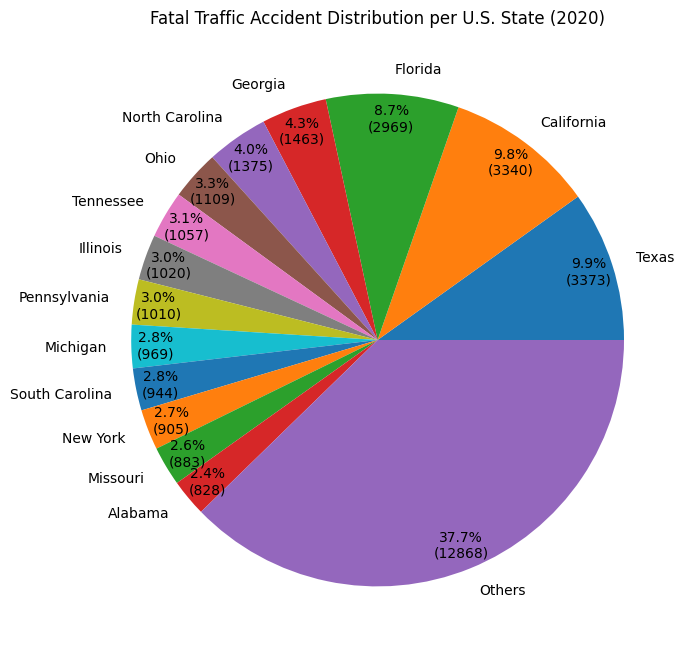

In [23]:

def func(pct):
    absolute = int(pct/100.*farsDf["accident"]["STATE"].count())
    return "{:.1f}%\n({:d})".format(pct, absolute)

#autopct = "%1.1f%%" if not using function

_ = accStatesDf.plot.pie(y="TotalAcc",figsize=(8,8),legend = False, title = "Fatal Traffic Accident Distribution per U.S. State (2020)", \
    ylabel = "", autopct=lambda pct: func(pct), pctdistance = 0.9, rotatelabels = False)



In [24]:
accTotalsDf = pd.DataFrame(dict(farsDf["accident"][["VE_TOTAL","VE_FORMS","PVH_INVL","PERSONS","PERMVIT","PERNOTMVIT","PEDS","FATALS"]].sum()),index = ["Total"])
accTotalsDf["Fatal Accidents"] = len(farsDf["accident"])
accTotalsDf["Occupants in Parked and Work Vehicles"] = accTotalsDf["PERNOTMVIT"] - accTotalsDf["PEDS"]
accTotalsDf = accTotalsDf.reindex(columns=['Fatal Accidents', 'VE_TOTAL', "VE_FORMS", 'PVH_INVL', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', "Occupants in Parked and Work Vehicles",'PEDS','FATALS'])
accTotalsDf.columns = ['Total Fatal Accidents', 'Total Vehicles', "Vehicles in Transport",'Parked and Working Vehicles', 'Vehicle Occupants', 'Occupants in Vehicles in Transport', 'Persons Not in Motor Vehicles in Transport', "Occupants in Parked and Work Vehicles", 'Person not in Vehicles','Fatalities']
accTotalsDf

,Total Fatal Accidents,Total Vehicles,Vehicles in Transport,Parked and Working Vehicles,Vehicle Occupants,Occupants in Vehicles in Transport,Persons Not in Motor Vehicles in Transport,Occupants in Parked and Work Vehicles,Person not in Vehicles,Fatalities
Total,34119,54020,52537,1483,75664,75301,7497,363,7134,37141


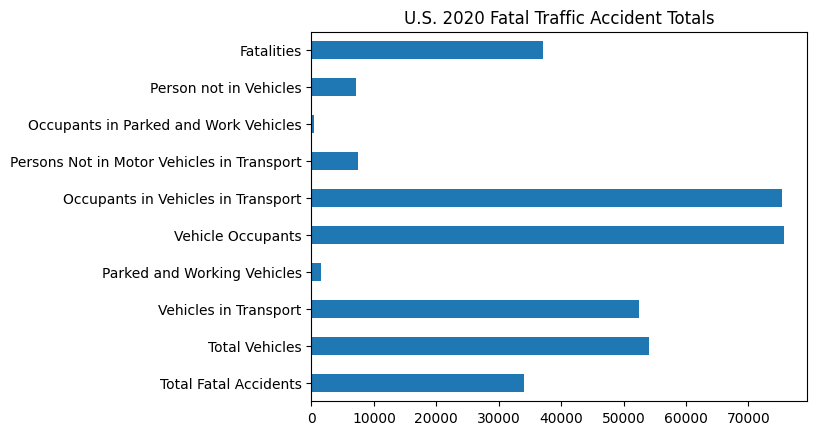

In [25]:
accTotalsSer = accTotalsDf.loc["Total"]
ax = accTotalsSer.plot.barh(title = "U.S. 2020 Fatal Traffic Accident Totals")

<AxesSubplot: title={'center': 'Vehicles in Transport vs Parked and Working Vehicles'}>

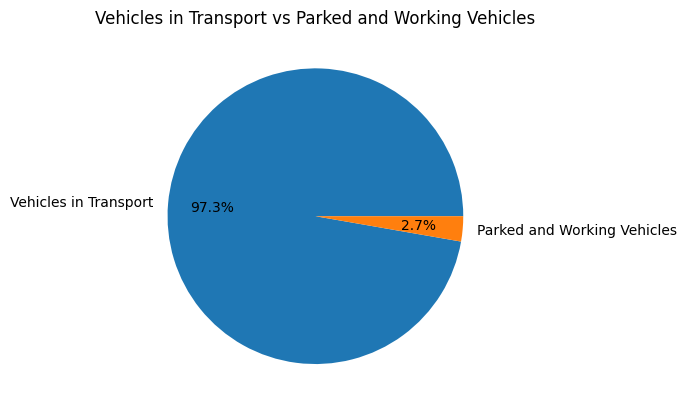

In [26]:
accTotalsDf.loc["Total"][["Vehicles in Transport",'Parked and Working Vehicles']].plot.pie(legend = False, title = "Vehicles in Transport vs Parked and Working Vehicles", \
    ylabel = "", autopct="%1.1f%%", pctdistance = 0.7, rotatelabels = False)

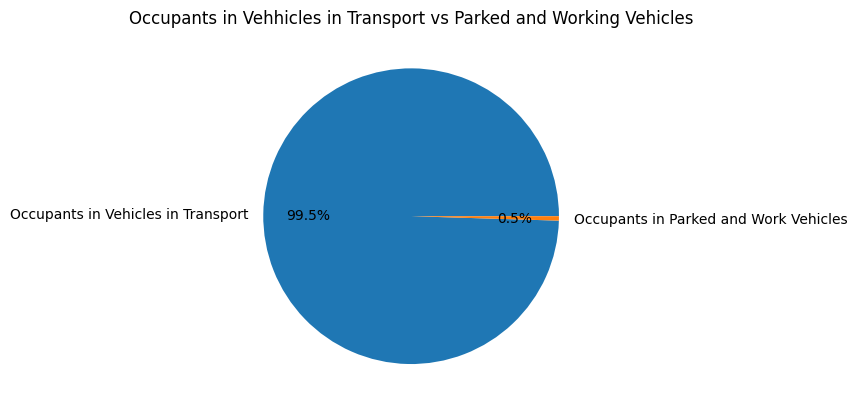

In [27]:
_ = accTotalsDf.loc["Total"][['Occupants in Vehicles in Transport',"Occupants in Parked and Work Vehicles"]].plot.pie(legend = False, title = "Occupants in Vehhicles in Transport vs Parked and Working Vehicles", \
    ylabel = "", autopct="%1.1f%%", pctdistance = 0.7, rotatelabels = False)

In [28]:
# accidents by month
accMonthDf = pd.DataFrame(farsDf["accident"]["MONTH"].value_counts()).sort_index()
accMonthDf.columns = ["TotalAcc"]
accMonthDf["MONTH"] = accMonthDf.index.values
accMonthDf["MONTH"] = accMonthDf.apply(lambda row: farsCategories["MONTH"][row["MONTH"]],axis=1)
#accMonthDf.loc["Others"] = [farsDf["accident"]["STATE"].count() - accMonthDf["TotalAcc"].sum(),"Others"]
accMonthDf.set_index("MONTH",inplace=True)
accMonthDf

,TotalAcc
MONTH,
January,2384
February,2358
March,2272
April,2029
May,2726
June,3231
July,3290
August,3367
September,3255


<AxesSubplot: title={'center': 'U.S. 2020 Fatal Traffic Accident per Month'}, xlabel='MONTH', ylabel='Total Falta Accidents'>

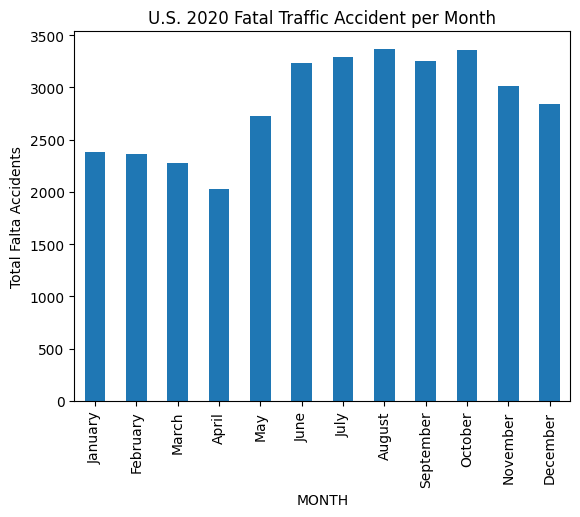

In [29]:
accMonthDf.plot.bar(title = "U.S. 2020 Fatal Traffic Accident per Month",legend = False, ylabel = "Total Falta Accidents")

In [30]:
# accidents by day of the week
accDayWeekDf = pd.DataFrame(farsDf["accident"]["DAY_WEEK"].value_counts()).sort_index()
accDayWeekDf.columns = ["TotalAcc"]
accDayWeekDf["DAY_WEEK"] = accDayWeekDf.index.values
accDayWeekDf["DAY_WEEK"] = accDayWeekDf.apply(lambda row: farsCategories["DAY_WEEK"][row["DAY_WEEK"]],axis=1)
#accMonthDf.loc["Others"] = [farsDf["accident"]["STATE"].count() - accMonthDf["TotalAcc"].sum(),"Others"]
accDayWeekDf.set_index("DAY_WEEK",inplace=True)
accDayWeekDf

,TotalAcc
DAY_WEEK,
Sunday,5292
Monday,4263
Tuesday,4336
Wednesday,4487
Thursday,4634
Friday,5241
Saturday,5866


<AxesSubplot: title={'center': 'U.S. 2020 Fatal Traffic Accident per Day of the Week'}, xlabel='Day of the Week', ylabel='Total Falta Accidents'>

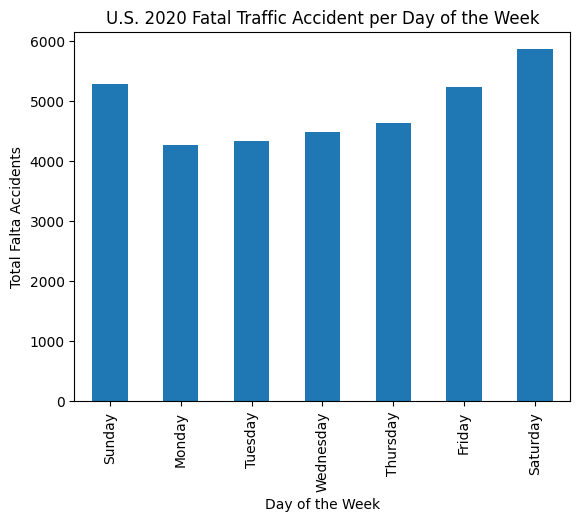

In [31]:
accDayWeekDf.plot.bar(title = "U.S. 2020 Fatal Traffic Accident per Day of the Week",legend = False, ylabel = "Total Falta Accidents", \
    xlabel = "Day of the Week")

<AxesSubplot: title={'center': 'U.S. 2020 Fatal Traffic Accident per Hour of the Day'}, xlabel='Hour of the Day (24h)', ylabel='Total Falta Accidents'>

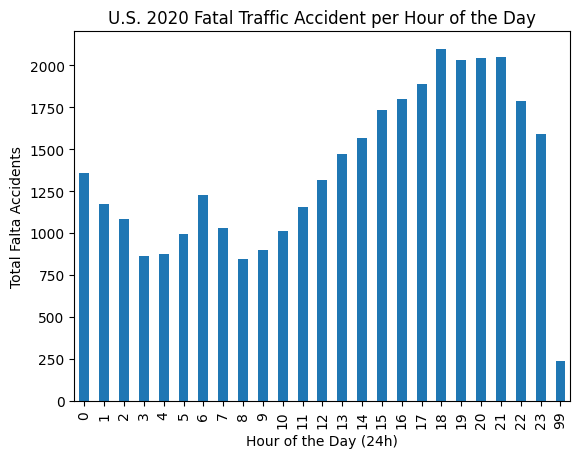

In [32]:
# accidents by hour of the day
farsDf["accident"]["HOUR"].value_counts().sort_index().plot.bar(title = "U.S. 2020 Fatal Traffic Accident per Hour of the Day",legend = False, ylabel = "Total Falta Accidents", \
    xlabel = "Hour of the Day (24h)")

------------------------  -----
Clear                     23905
Cloudy                     4450
Rain                       2544
Not Reported               2278
Fog, Smog, Smoke            352
Snow                        278
Reported as Unknown         146
Severe Crosswinds            54
Freezing Rain or Drizzle     38
Blowing Snow                 26
Sleet or Hail                26
Other                        19
Blowing Sand, Soil, Dirt      3
------------------------  -----


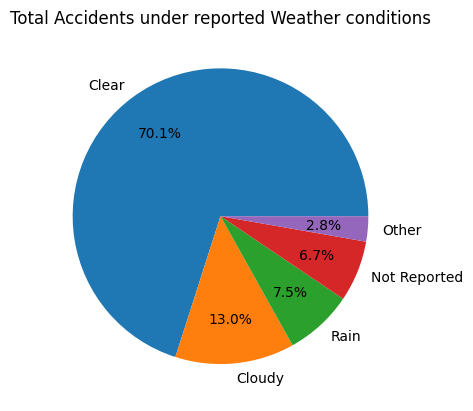

In [33]:
_ = PlotPie(farsDf["accident"],"WEATHER",farsCategories,"Total Accidents under reported Weather conditions",0.05)

-----------------------  -----
Daylight                 15903
Dark - Not Lighted        9350
Dark - Lighted            6877
Dusk                       923
Dawn                       630
Dark - Unknown Lighting    267
Reported as Unknown        111
Not Reported                43
Other                       15
-----------------------  -----


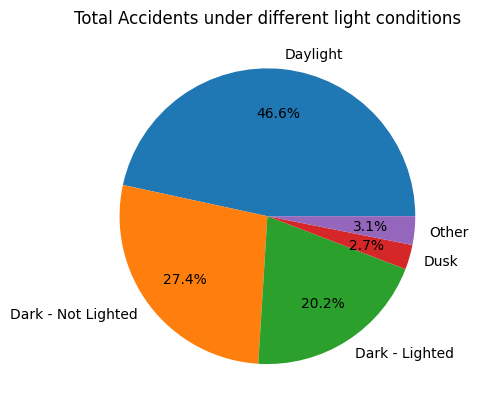

In [34]:
_ = PlotPie(farsDf["accident"],"LGT_COND",farsCategories,"Total Accidents under different light conditions", 0.02)

---------------------------------  -----
Dry                                43264
Wet                                 5994
Not Reported                         660
Non-Trafficway or Driveway Access    393
Ice/Frost                            355
Snow                                 255
Mud, Dirt or Gravel                  151
Water (Standing or Moving)           103
Reported as Unknown                  102
Slush                                 92
Other                                 51
Sand                                  11
Oil                                    4
---------------------------------  -----


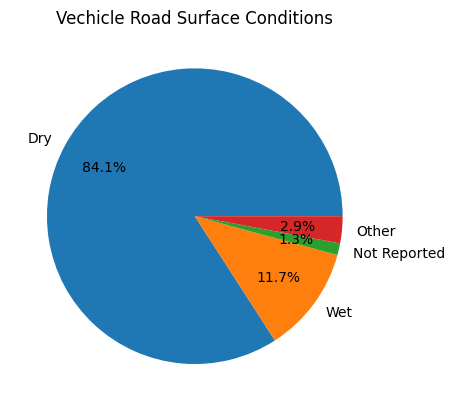

In [36]:
# Road Surface Conditions
_ = PlotPie(farsDf["vehicle"],"VSURCOND",farsCategories,"Vechicle Road Surface Conditions",0.01)


--  -----
 0    439
 5     14
10     31
15     80
20    129
25   2248
30   2390
35   5464
40   3799
45   8172
50   2394
55  12941
60   1992
65   4732
70   3452
75   1045
80    138
85      2
98   1754
99    219
--  -----
median speed limit = 50.0
averga speed limit = 49.18482875742995


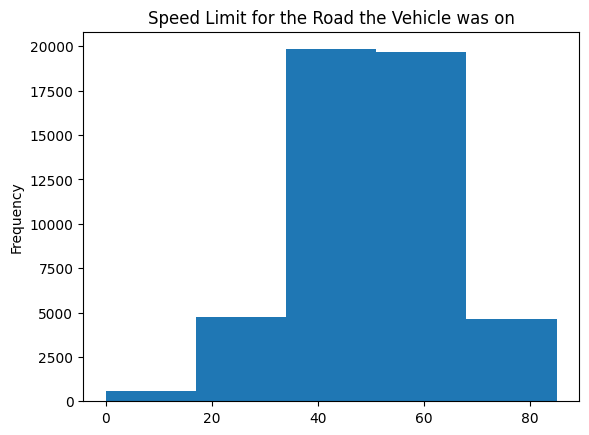

In [37]:
_ = farsDf["vehicle"][farsDf["vehicle"]["VSPD_LIM"] < 98]["VSPD_LIM"].plot.hist(bins=5,title="Speed Limit for the Road the Vehicle was on")
print(tabulate(pd.DataFrame(farsDf["vehicle"]["VSPD_LIM"].value_counts().sort_index())))
print("median speed limit =",farsDf["vehicle"][farsDf["vehicle"]["VSPD_LIM"] < 98]["VSPD_LIM"].median())
print("averga speed limit =",farsDf["vehicle"][farsDf["vehicle"]["VSPD_LIM"] < 98]["VSPD_LIM"].mean())

---------------------------------------------------  ----
Principal Arterial - Other                           9897
Minor Arterial                                       7344
Major Collector                                      5167
Interstate                                           4282
Local                                                4137
Principal Arterial - Other Freeways and Expressways  1419
Minor Collector                                      1132
Not Reported                                          620
Trafficway Not in State Inventory                      64
Unknown                                                57
---------------------------------------------------  ----


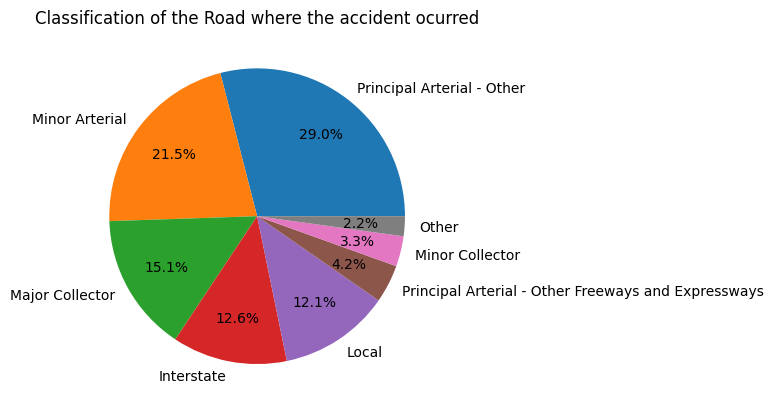

In [ ]:
_ = PlotPie(farsDf["accident"],"FUNC_SYS",farsCategories,"Classification of the Road where the accident ocurred",0.02)

------------  -----
0               393
1               763
2             31868
3              6837
4              5442
5              4187
6               950
7               593
Not Reported    389
Unknown          13
------------  -----


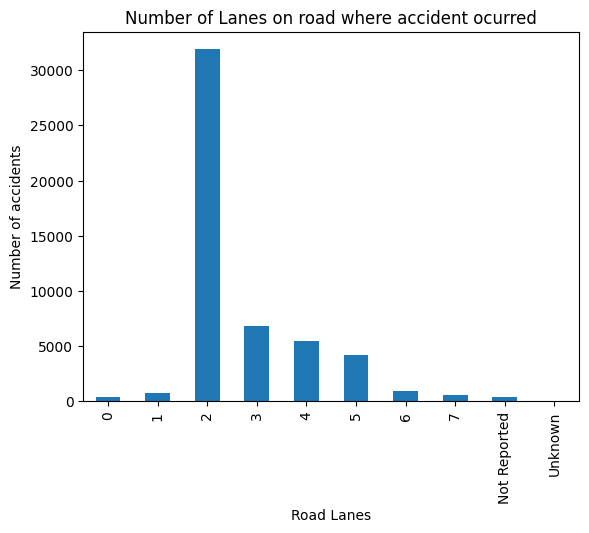

In [87]:
# number of lines 
numLanesSer = farsDf["vehicle"]["VNUM_LAN"].value_counts(sort=False).sort_index().rename({8 : "Not Reported",9:"Unknown"})
print(tabulate(pd.DataFrame(numLanesSer)))
ax = numLanesSer.plot.bar(title="Number of Lanes on road where accident ocurred",xlabel="Road Lanes",ylabel="Number of accidents")

---------------------------------  ----
Chevrolet                          6991
Ford                               6986
Toyota                             4317
Honda                              4084
Dodge                              3180
Nissan/Datsun                      2972
Harley-Davidson                    2112
GMC                                1739
Jeep / Kaiser-Jeep / Willys- Jeep  1528
Hyundai                            1364
Freightliner                       1206
KIA                                1118
Other Make                          800
Chrysler                            756
Suzuki                              747
Yamaha                              703
Buick / Opel                        677
BMW                                 622
Mazda                               557
Peterbilt                           548
International Harvester/Navistar    532
Subaru                              527
Kawasaki                            522
Volvo                               514


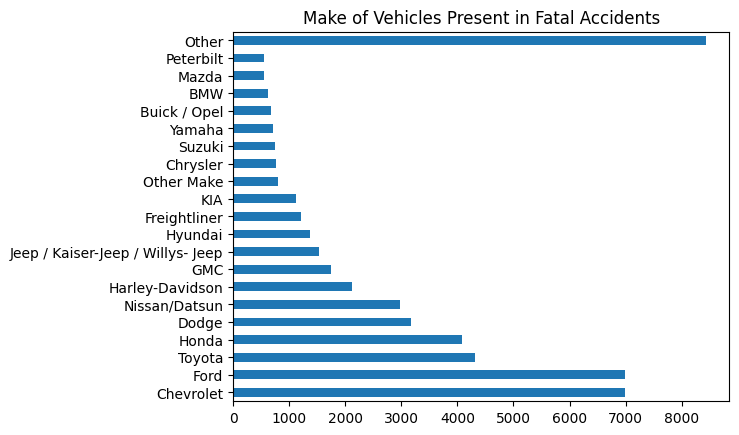

In [40]:
_ = PlotBarh(farsDf["vehicle"],"MAKE",farsCategories,"Make of Vehicles Present in Fatal Accidents",20)

----------------------------------------------------------------------------  ----
Silverado                                                                     1945
F-150                                                                         1593
Accord                                                                        1207
Camry                                                                         1037
Civic                                                                         1004
Altima                                                                         840
Ram                                                                            825
Sierra                                                                         793
Corolla                                                                        758
F-250                                                                          595
Explorer                                                                       587
Impa

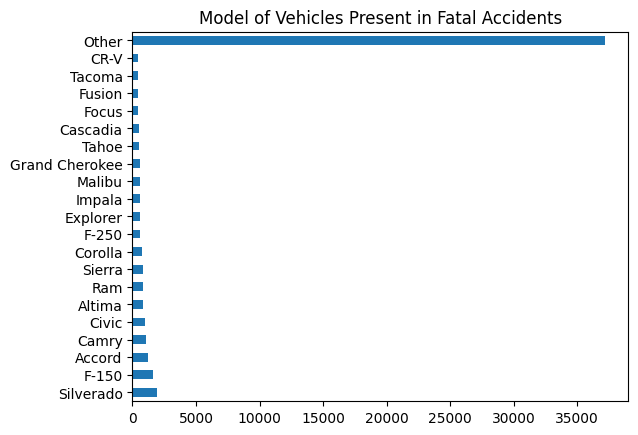

In [41]:
_ = PlotBarh(farsDf["vpicdecode"],"ModelId",farsCategories,"Model of Vehicles Present in Fatal Accidents",20)

In [42]:
# Save top 20 vehicles present in crashes
farsTopModels = pd.DataFrame(farsDf["vpicdecode"]["ModelId"].value_counts().head(20).index)
farsTopModels.columns = ["ModelId"]
farsTopModels["ModelId"] = farsTopModels["ModelId"].astype("int64")
print(tabulate(farsTopModels.replace(farsCategories["ModelId"])))

--  --------------
 0  Silverado
 1  F-150
 2  Accord
 3  Camry
 4  Civic
 5  Altima
 6  Ram
 7  Sierra
 8  Corolla
 9  F-250
10  Explorer
11  Impala
12  Malibu
13  Grand Cherokee
14  Tahoe
15  Cascadia
16  Focus
17  Fusion
18  Tacoma
19  CR-V
--  --------------


In [43]:
# Vehicle Model Year
vehYrDf = pd.DataFrame(farsDf["vehicle"]["MOD_YEAR"].value_counts())
vehYrDf.columns = ["TotalVehicles"]
vehYrDf["MOD_YEAR"] = vehYrDf.index.values
#vehYrDf["MAKE"] = vehYrDf.apply(lambda row: farsCategories["MAKE"][row["MAKE"]],axis=1)
#vehYrDf.set_index("MOD_YEAR",inplace=True)
totalVeh = len(farsDf["vehicle"])
#vehYrDf.loc["Others"] = [totalVeh - vehYrDf["TotalVehicles"].sum()]
#vehYrDf.loc["Unknown"] = [vehYrDf.loc[9998]["TotalVehicles"] + vehYrDf.loc[9999]["TotalVehicles"],np.NaN]
#vehYrDf.drop(index=[9998,9999],inplace=True)
vehYrDf

,TotalVehicles,MOD_YEAR
2016,2825,2016
2007,2778,2007
2019,2662,2019
2015,2623,2015
2017,2593,2017
2005,2587,2005
2006,2535,2006
2008,2427,2008
2018,2422,2018
2014,2388,2014


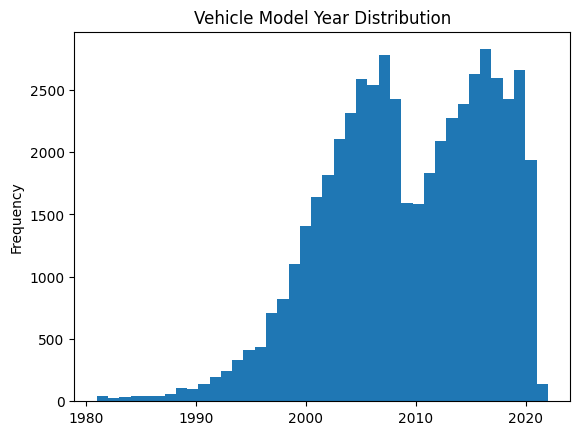

In [44]:
_ = farsDf["vehicle"][farsDf["vehicle"]["MOD_YEAR"] < 9998]["MOD_YEAR"].plot.hist(bins=40,title="Vehicle Model Year Distribution")

Text(0.5, 1.0, 'Vehicle Model Year')

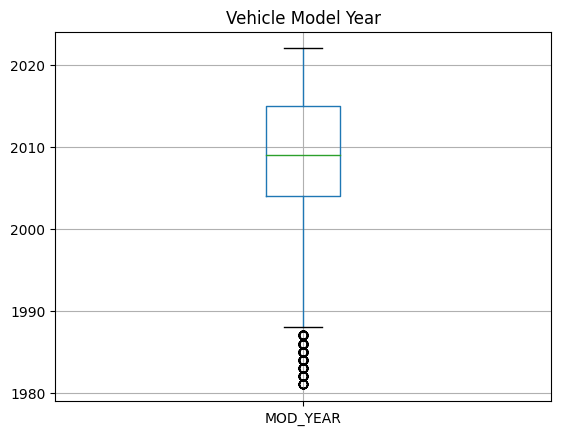

In [45]:
#ax = vehYrDf.boxplot(column="MOD_YEAR")
ax = farsDf["vehicle"][farsDf["vehicle"]["MOD_YEAR"] < 9998].boxplot(column="MOD_YEAR")
ax.set_title("Vehicle Model Year")

---------------------------------------------------------------------------  -----
Sedan/Saloon                                                                 14881
Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)                      11237
Pickup                                                                        8959
Truck-Tractor                                                                 2760
Coupe                                                                         1799
Motorcycle - Sport                                                            1614
Hatchback/Liftback/Notchback                                                  1430
Motorcycle - Touring / Sport Touring                                          1257
Minivan                                                                       1037
Motorcycle - Custom                                                            890
Truck                                                                          881
Moto

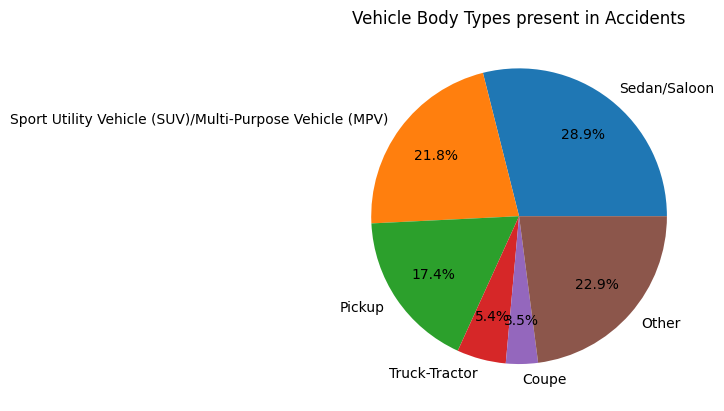

In [46]:
# Vehicle Body class
_ = PlotPie(farsDf["vehicle"],"VPICBODYCLASS",farsCategories,"Vehicle Body Types present in Accidents",0.034)

---  -----
No   42211
Yes   9224
---  -----


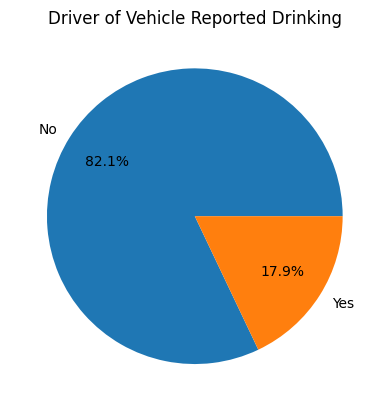

In [47]:
# Driver was Drinking
_ = PlotPie(farsDf["vehicle"],"DR_DRINK",farsCategories,"Driver of Vehicle Reported Drinking")

In [48]:
# simplify access to driver information from "person" table
driversDf = farsDf["person"][farsDf["person"]["PER_TYP"] == 1]
totalDrivers = len(driversDf)

In [49]:
# Driver's Sex
drSexDf = pd.DataFrame(driversDf["SEX"].value_counts().sort_values(ascending=False))
drSexDf.columns = ["TotalDrivers"]
drSexDf["SEX"] = drSexDf.index.values
drSexDf["SEX"] = drSexDf.apply(lambda row: farsCategories["SEX"][row["SEX"]],axis=1)
drSexDf.set_index("SEX",inplace=True)
# Combine 'Reported as Unknown' and 'Not Reported'
drSexDf.loc["Unknown"] = drSexDf.loc["Reported as Unknown"] + drSexDf.loc["Not Reported"]
drSexDf.drop(index=["Reported as Unknown","Not Reported"],inplace=True)
drSexDf

,TotalDrivers
SEX,
Male,39393
Female,13033
Unknown,1464


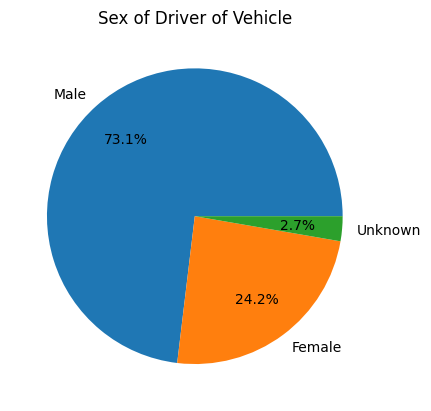

In [50]:
_ = drSexDf["TotalDrivers"].plot.pie(legend = False, title = "Sex of Driver of Vehicle", \
    ylabel = "", autopct="%1.1f%%", pctdistance = 0.7, rotatelabels = False)

In [51]:
# Driver's Age
drAgeDf = pd.DataFrame(driversDf["AGE"].value_counts().sort_index())
drAgeDf.columns = ["TotalDrivers"]
drAgeDf["AGE"] = drAgeDf.index.values
#drAgeDf["SEX"] = drAgeDf.apply(lambda row: farsCategories["SEX"][row["SEX"]],axis=1)
#drAgeDf.set_index("AGE",inplace=True)
# Combine 'Reported as Unknown' and 'Not Reported'
drAgeDf.loc["Unknown"] = [drAgeDf.loc[998]["TotalDrivers"] + drAgeDf.loc[999]["TotalDrivers"],np.NaN]
drAgeDf.drop(index=[998,999],inplace=True)
drAgeDf

,TotalDrivers,AGE
7,2.0,7.0
8,2.0,8.0
9,1.0,9.0
10,5.0,10.0
11,3.0,11.0
...,...,...
98,1.0,98.0
99,4.0,99.0
100,1.0,100.0
102,1.0,102.0


In [52]:
drAgeDf["AGE"].describe()

count     95.000000
mean      54.010526
std       27.586419
min        7.000000
25%       30.500000
50%       54.000000
75%       77.500000
max      102.000000
Name: AGE, dtype: float64

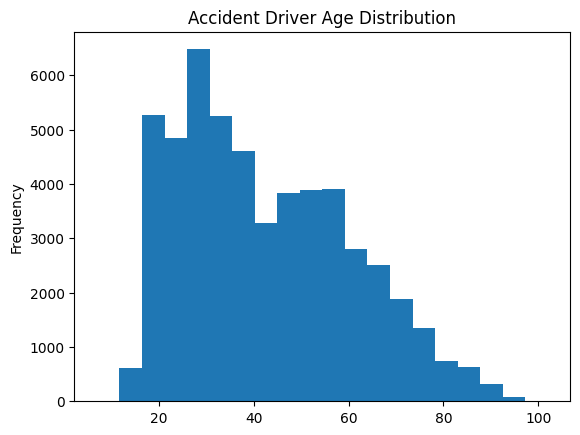

In [53]:
#_ = drAgeDf.drop(index="Unknown").plot.hist(by="TotalDrivers")
_ = driversDf[driversDf["AGE"] < 998]["AGE"].plot.hist(bins=20,title="Accident Driver Age Distribution")

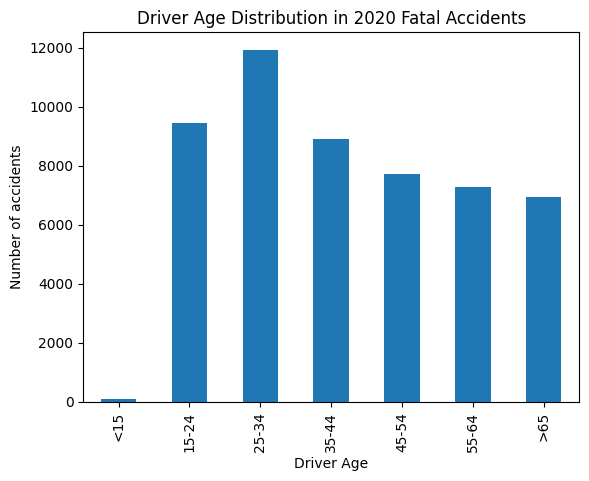

In [54]:
driverAgeCut = pd.cut(driversDf[driversDf["AGE"] < 998]["AGE"],[0,14,24,34,44,54,64,200],labels=["<15","15-24","25-34","35-44","45-54","55-64",">65"])
#_ = driverAgeCut.plot.scatter(title="Accident Driver Age Distribution")
#driverAgeCut.value_counts().plot.bar()
ax = driverAgeCut.value_counts(sort=False).plot.bar(title="Driver Age Distribution in 2020 Fatal Accidents",xlabel="Driver Age",ylabel="Number of accidents")

Text(0.5, 0.98, '')

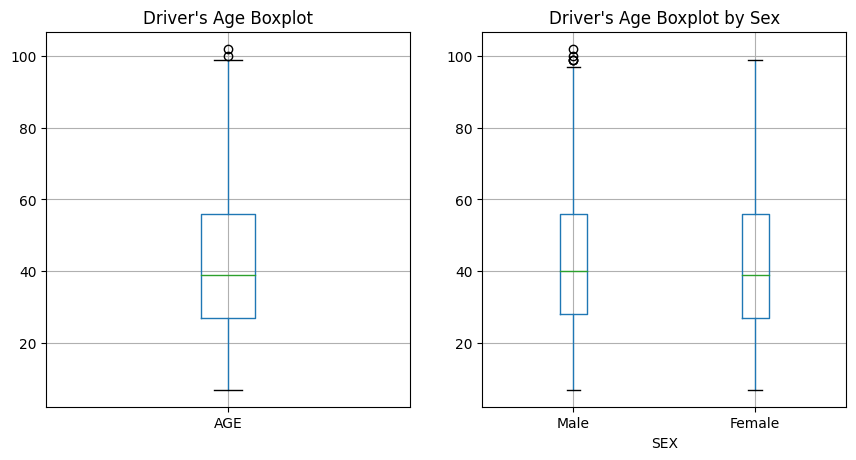

In [55]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
driversDf[driversDf["AGE"] < 998].boxplot(column="AGE",ax=ax1)
ax1.set_title("Driver's Age Boxplot")
driversDf[(driversDf["AGE"] < 998) & (driversDf["SEX"].isin([1,2]))].boxplot(column="AGE",by="SEX",ax=ax2)
ax2.set_title("Driver's Age Boxplot by Sex")
a = ax2.get_xticklabels()
ax2.set_xticklabels([farsCategories["SEX"][int(a[0].get_text())],farsCategories["SEX"][int(a[1].get_text())]])
fig.suptitle("")


-----------------------------------  -----
Motor Vehicle In-Transport           13589
Fixed object                          8737
Pedestrian                            5104
Rollover/Overturn                     2544
Traffic Barrier                       1619
Pedalcyclist                           826
Parked Motor Vehicle                   439
Object not-fixed                       305
Non-Collision                          260
Animal                                 196
Non-Motorist on Personal Conveyance    151
Road Surface                           113
Building                                96
Railway Vehicle                         76
Unknown                                 23
Working Motor Vehicle                   21
Jackknife                               14
Snow Bank                                6
-----------------------------------  -----


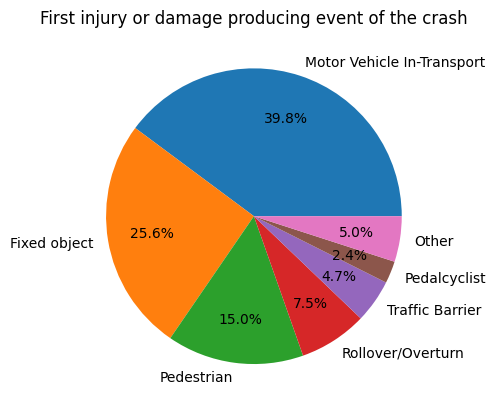

In [56]:
_ = PlotPie(farsDf["accident"],"HARM_EV_SIMP",farsCategories,"First injury or damage producing event of the crash",0.02)

-----------------------------------------------------------------------------  -----
The First Harmful Event was Not a Collision with a Motor Vehicle in Transport  20525
Angle                                                                           6416
Front-to-Front                                                                  3619
Front-to-Rear                                                                   2418
Sideswipe - Same Direction                                                       527
Sideswipe - Opposite Direction                                                   420
Other                                                                            101
Not Reported                                                                      34
Rear-to-Side                                                                      30
Reported as Unknown                                                               27
Rear-to-Rear                                                     

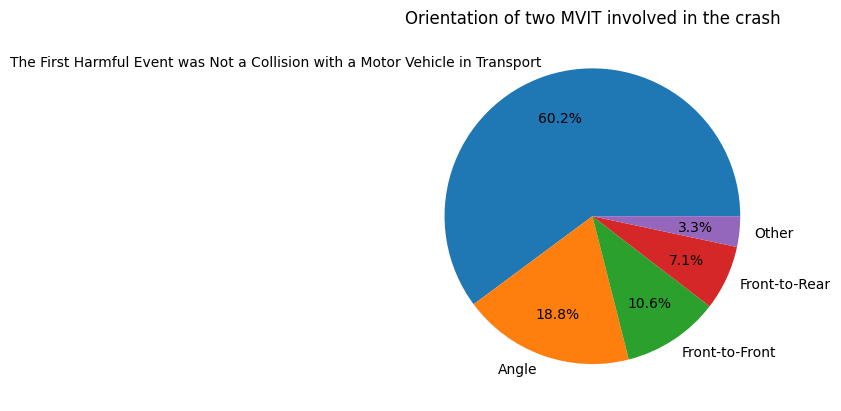

In [57]:
_ = PlotPie(farsDf["accident"],"MAN_COLL",farsCategories,"Orientation of two MVIT involved in the crash",0.03)

In [58]:
farsDf["accident"][farsDf["accident"]["MAN_COLL"]==0]["VE_TOTAL"].value_counts()

1     18435
2      1584
3       342
4        92
5        44
6        14
7        12
11        1
8         1
Name: VE_TOTAL, dtype: int64

-----------------------------------  -----
Motor Vehicle In-Transport           29566
Fixed object                          6525
Pedestrian                            5707
Rollover/Overturn                     5211
Traffic Barrier                       1209
Non-Collision                         1030
Pedalcyclist                           863
Parked Motor Vehicle                   387
Object not-fixed                       261
Building                               193
Non-Motorist on Personal Conveyance    160
Animal                                 148
Railway Vehicle                         79
Road Surface                            52
Unknown                                 24
Working Motor Vehicle                   18
Jackknife                                2
-----------------------------------  -----


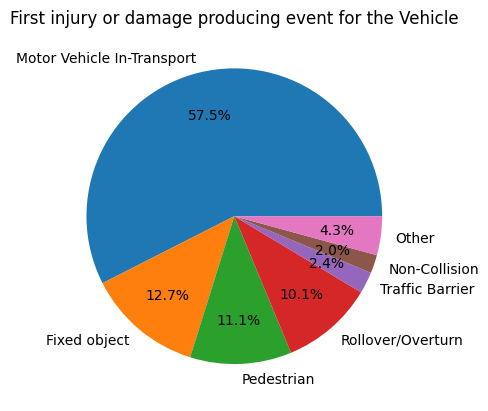

In [59]:
_ = PlotPie(farsDf["vehicle"],"M_HARM_SIMP",farsCategories,"First injury or damage producing event for the Vehicle",0.02)

-------------------------------------------------------------  -----
12 Clock Point                                                 28805
6 Clock Point                                                   3180
Non-Collision                                                   2894
11 Clock Point                                                  2133
9 Clock Point                                                   2053
1 Clock Point                                                   1926
Not Reported                                                    1831
3 Clock Point                                                   1745
Left                                                             825
10 Clock Point                                                   713
Right                                                            654
2 Clock Point                                                    620
Left-Front Side                                                  612
7 Clock Point                     

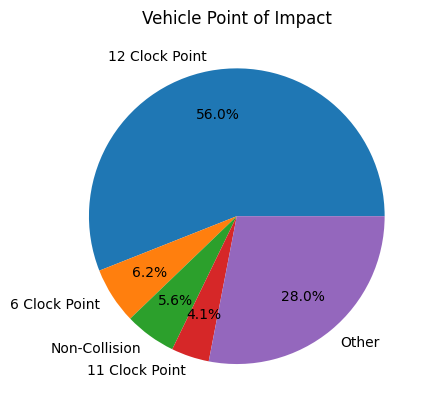

In [60]:
# for Events including Motort Vehicle in Transport orientation of montor vehicles
_ = PlotPie(farsDf["vehicle"],"IMPACT1",farsCategories,"Vehicle Point of Impact",0.04)

Points of impact


![IMPACT1](FARS-AREAOFIMPACT.jpg)

--------------------------------------------------------------------------------------------  ----
M98-Other Crash Type                                                                          7126
C13-Single Driver-Forward Impact-Pedestrian/ Animal                                           5980
A1-Single Driver-Right Roadside Departure-Drive Off Road                                      4786
B6-Single Driver-Left Roadside Departure-Drive Off Road                                       3476
G50-Same Trafficway, Opposite Direction-Head-On-Lateral Move (Left/Right)                     2551
G51-Same Trafficway, Opposite Direction-Head-On-Lateral Move (Going Straight)                 2535
J68-Trafficway Vehicle Turning-Turn Across Path-Initial Opposite Directions (Left/Right)      1678
J69-Trafficway Vehicle Turning-Turn Across Path-Initial Opposite Directions (Going Straight)  1656
A2-Single Driver-Right Roadside Departure-Control/Traction Loss                               1655
B7-Single 

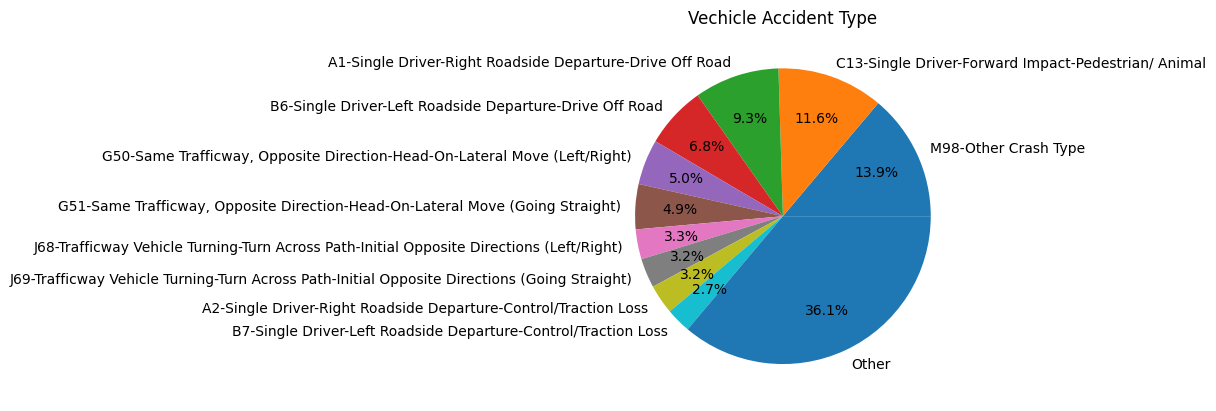

In [61]:
# Accident Type
_ = PlotPie(farsDf["vehicle"],"ACC_TYPE",farsCategories,"Vechicle Accident Type",0.025)


## Safety features

In [62]:
safetyFeaturesColumns = [
 	"ForwardCollisionWarningId",
	"DynamicBrakeSupportId",
	"CrashImminentBrakingID",
	"PedestrianAutoEmergencyBrakingId",
	"BlindSpotWarningId",
	"BlindSpotInterventionId",
	"LaneDepartureWarningId",
	"LaneKeepingAssistanceId",
	"LaneCenteringAssistanceId",
	"BackupCameraId",
	"RearCrossTrafficAlertId",
	"RearAutomaticEmergencyBrakingId",
	"ParkAssistId",
	"DaytimeRunningLightId",
	#"HeadlampLightSourceId",
	"SemiAutoHeadlampBeamSwitchingId",
	"AdaptiveDrivingBeamId",
	"AdaptiveCruiseControlId",
	"AntilockBrakeSystemId",
	"ElectronicStabilityControlId",
	"TPMSId",
	"TractionControlId",
	"AutoPedestrianAlertingSoundId",
]

safetyFeaturesNames = {
 	"ForwardCollisionWarningId" : "Forward Collision Warning",
	"DynamicBrakeSupportId" : "Dynamic Brake Support",
	"CrashImminentBrakingID" : "Crash Imminent Braking",
	"PedestrianAutoEmergencyBrakingId" : "Pedestrian Auto Emergency Braking",
	"BlindSpotWarningId" : "Blind Spot Warning",
	"BlindSpotInterventionId": "Blind Spot Intervention",
	"LaneDepartureWarningId" : "Lane Departure Warning",
	"LaneKeepingAssistanceId" : "Lane Keeping Assistance",
	"LaneCenteringAssistanceId" : "Lane Centering Assistance",
	"BackupCameraId" : "Backup Camera",
	"RearCrossTrafficAlertId" : "Rear Cross Traffic Alert",
	"RearAutomaticEmergencyBrakingId" : "Rear Automatic Emergency Braking",
	"ParkAssistId" : "Park Assist",
	"DaytimeRunningLightId" : "Daytime Running Light",
	#"HeadlampLightSourceId",
	"SemiAutoHeadlampBeamSwitchingId" : "Semi Auto Headlamp Beam Switching",
	"AdaptiveDrivingBeamId" : "Adaptive Driving Beam",
	"AdaptiveCruiseControlId" : "Adaptive Cruise Control",
	"AntilockBrakeSystemId" : "Antilock Brake System",
	"ElectronicStabilityControlId" : "Electronic Stability Control",
	"TPMSId" : "Tire Pressure Monitoring System",
	"TractionControlId" : "Traction Control",
	"AutoPedestrianAlertingSoundId" : "Auto Pedestrian Alerting Sound",
}


def AnyStdSafetyFeature(vpicRow):
	"""Returns true if any of the safety features are marked standard for the vehicle checked 
	(vpicdecode columnnames are used)attribute value = 1 means standard
	"""
	
	stdFeatureFlag = False
	for feat in safetyFeaturesColumns:
		stdFeatureFlag = stdFeatureFlag | (vpicRow[feat] == 1)
	return stdFeatureFlag

def GoodVPICDecode(picDecodeResult):
	return (picDecodeResult in {'0','0,10','1,10','1,400','1,10,400'})


In [63]:
# check categories for Safe Features to be used for NYSDMV VPIC DECODE

for col in sorted(safetyFeaturesColumns):
    print(col.ljust(max([len(x) for x in safetyFeaturesColumns])+4),farsCategories[col])

AdaptiveCruiseControlId              {nan: nan, 1.0: 'Standard', 0.0: 'Not Applicable', 3.0: 'Optional', 2.0: 'Not Available'}
AdaptiveDrivingBeamId                {nan: nan, 1.0: 'Standard', 0.0: 'Not Applicable', 3.0: 'Optional', 2.0: 'Not Available'}
AntilockBrakeSystemId                {nan: nan, 1.0: 'Standard', 3.0: 'Optional', 2.0: 'Not Available'}
AutoPedestrianAlertingSoundId        {nan: nan, 0.0: 'Not Applicable', 2.0: 'Not Available', 1.0: 'Standard', 3.0: 'Optional'}
BackupCameraId                       {nan: nan, 1.0: 'Standard', 3.0: 'Optional', 0.0: 'Not Applicable', 2.0: 'Not Available'}
BlindSpotInterventionId              {nan: nan}
BlindSpotWarningId                   {nan: nan, 1.0: 'Standard', 3.0: 'Optional', 0.0: 'Not Applicable', 2.0: 'Not Available'}
CrashImminentBrakingID               {nan: nan, 1.0: 'Standard', 0.0: 'Not Applicable', 3.0: 'Optional', 2.0: 'Not Available'}
DaytimeRunningLightId                {nan: nan, 3.0: 'Optional', 1.0: 'Standard', 0.0:

In [64]:
farsDf["vpicdecode"].info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52890 entries, 0 to 52889
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ST_CASE                           52890 non-null  int64  
 1   VEH_NO                            52890 non-null  int64  
 2   VehicleDescriptor                 52890 non-null  object 
 3   VINDecodeError                    52890 non-null  object 
 4   VehicleTypeId                     52890 non-null  int64  
 5   ManufacturerFullNameId            52890 non-null  int64  
 6   MakeId                            52890 non-null  int64  
 7   ModelId                           52888 non-null  float64
 8   ModelYear                         52890 non-null  int64  
 9   Series                            32036 non-null  object 
 10  Trim                              18339 non-null  object 
 11  Series2                           7817 non-null   object 
 12  Trim

In [65]:
farsDf["vpicdecode"].describe(include="all")

,ST_CASE,VEH_NO,VehicleDescriptor,VINDecodeError,VehicleTypeId,ManufacturerFullNameId,MakeId,ModelId,ModelYear,Series,Trim,Series2,Trim2,BodyClassId,DoorsCount,GrossVehicleWeightRatingFromId,GrossVehicleWeightRatingToId,SeatsCount,EngineCylindersCount,ForwardCollisionWarningId,DynamicBrakeSupportId,CrashImminentBrakingID,PedestrianAutoEmergencyBrakingId,BlindSpotWarningId,BlindSpotInterventionId,LaneDepartureWarningId,LaneKeepingAssistanceId,LaneCenteringAssistanceId,BackupCameraId,RearCrossTrafficAlertId,RearAutomaticEmergencyBrakingId,ParkAssistId,DaytimeRunningLightId,HeadlampLightSourceId,SemiAutoHeadlampBeamSwitchingId,AdaptiveDrivingBeamId,AdaptiveCruiseControlId,AntilockBrakeSystemId,ElectronicStabilityControlId,TPMSId,TractionControlId,AutoPedestrianAlertingSoundId
count,52890.000000,52890.000000,52890,52890,52890.000000,52890.000000,52890.000000,52888.000000,52890.000000,32036,18339,7817,624,52887.000000,35029.000000,36463.000000,65.000000,5385.000000,47335.000000,8428.000000,10811.000000,8202.000000,6995.000000,8294.000000,0.0,8247.000000,8006.000000,7.000000,11072.000000,5941.000000,0.0,6390.000000,10319.000000,6017.00000,10490.000000,7572.000000,7690.000000,6782.000000,5504.0,20126.000000,5269.000000,6021.000000
unique,NaN,NaN,23217,7,NaN,NaN,NaN,NaN,NaN,2390,1396,171,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,1N4AL3AP*FC******,0,NaN,NaN,NaN,NaN,NaN,SE,1/2 Ton,Wagon body style,M Grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,72,52236,NaN,NaN,NaN,NaN,NaN,1010,1170,2356,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,273558.101134,1.483210,NaN,NaN,3.669938,1315.258537,654.980753,4231.305268,2009.135073,NaN,NaN,NaN,NaN,30.747121,3.847269,11.860214,9.153846,5.235840,5.483490,0.554817,0.488021,0.501097,0.268192,0.649506,NaN,0.570147,0.791906,1.285714,0.517070,0.062952,NaN,0.244444,0.469425,0.11883,0.477979,0.441891,0.484265,1.001622,1.0,1.076965,1.001139,0.075237
std,163345.070857,0.801542,NaN,NaN,2.459962,1576.933663,792.316004,4636.948324,7.242620,NaN,NaN,NaN,NaN,29.938339,0.731806,2.905580,1.813412,0.960057,1.809661,0.967962,0.542479,0.914361,0.664565,1.111645,NaN,1.012963,1.628115,0.755929,0.587312,0.336964,NaN,0.758752,0.556909,0.55184,0.557446,0.909847,0.958537,0.050044,0.0,0.266729,0.047714,0.337304
min,10001.000000,1.000000,NaN,NaN,1.000000,955.000000,440.000000,1684.000000,1981.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,1.000000,0.000000
25%,122233.250000,1.000000,NaN,NaN,2.000000,984.000000,460.000000,1852.000000,2004.000000,NaN,NaN,NaN,NaN,7.000000,4.000000,10.000000,9.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000
50%,260906.000000,1.000000,NaN,NaN,3.000000,994.000000,474.000000,2073.000000,2009.000000,NaN,NaN,NaN,NaN,13.000000,4.000000,12.000000,9.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000
75%,420604.750000,2.000000,NaN,NaN,7.000000,1034.000000,485.000000,3286.000000,2015.000000,NaN,NaN,NaN,NaN,60.000000,4.000000,14.000000,9.000000,5.000000,6.000000,1.000000,1.000000,1.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000


In [66]:
farsDf["vpicdecode"]["VINDecodeError"].value_counts()

0           52236
0,10          401
1             218
1,10           19
1,400           9
400             4
1,10,400        3
Name: VINDecodeError, dtype: int64

In [67]:
badVPICcount = len(farsDf["vpicdecode"]) - (farsDf["vpicdecode"]["VINDecodeError"] == '0').sum()
print("Bad VIN Decodes = ",badVPICcount, "(", badVPICcount/len(farsDf["vpicdecode"])*100,"%)")

Bad VIN Decodes =  654 ( 1.2365286443562111 %)


In [68]:
farsDf["vpicdecode"]["AnySafetyFeature"] = farsDf["vpicdecode"].apply(lambda row: AnyStdSafetyFeature(row),axis=1)
#farsDf["vpicdecode"]["GoodVPICDecode"] = farsDf["vpicdecode"].apply(lambda row: (row["VINDecodeError"] == '0'),axis=1)
farsDf["vpicdecode"]["GoodVPICDecode"] = farsDf["vpicdecode"].apply(lambda row: (GoodVPICDecode(row["VINDecodeError"])),axis=1)


In [69]:
print(farsDf["vpicdecode"]["GoodVPICDecode"].sum())
print(farsDf["vpicdecode"]["AnySafetyFeature"].sum())
badVPICcount = len(farsDf["vpicdecode"]) - farsDf["vpicdecode"]["GoodVPICDecode"].sum()
print("Bad VIN Decodes = ",badVPICcount, "(", badVPICcount/len(farsDf["vpicdecode"])*100,"%)")

52668
20404
Bad VIN Decodes =  222 ( 0.41973908111174135 %)


In [70]:
badVINrecords = farsDf["vpicdecode"][farsDf["vpicdecode"]["GoodVPICDecode"]==False]
badVINrecords

,ST_CASE,VEH_NO,VehicleDescriptor,VINDecodeError,VehicleTypeId,ManufacturerFullNameId,MakeId,ModelId,ModelYear,Series,Trim,Series2,Trim2,BodyClassId,DoorsCount,GrossVehicleWeightRatingFromId,GrossVehicleWeightRatingToId,SeatsCount,EngineCylindersCount,ForwardCollisionWarningId,DynamicBrakeSupportId,CrashImminentBrakingID,PedestrianAutoEmergencyBrakingId,BlindSpotWarningId,BlindSpotInterventionId,LaneDepartureWarningId,LaneKeepingAssistanceId,LaneCenteringAssistanceId,BackupCameraId,RearCrossTrafficAlertId,RearAutomaticEmergencyBrakingId,ParkAssistId,DaytimeRunningLightId,HeadlampLightSourceId,SemiAutoHeadlampBeamSwitchingId,AdaptiveDrivingBeamId,AdaptiveCruiseControlId,AntilockBrakeSystemId,ElectronicStabilityControlId,TPMSId,TractionControlId,AutoPedestrianAlertingSoundId,AnySafetyFeature,GoodVPICDecode
665,10454,1,1GNFK16Z*2J******,1,7,984,467,1851.0,2002,1500,1/2 Ton,NaN,NaN,7.0,NaN,15.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
705,10479,3,3D6WC76A*8G******,1,10,1002,476,1958.0,2008,NaN,5500,NaN,NaN,63.0,NaN,6.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1047,10697,1,3VWJM71K*9M******,1,2,1147,482,3137.0,2009,S,NaN,NaN,NaN,13.0,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,True,False
1396,40027,1,SALPM164*1A******,1,7,1079,444,2247.0,2001,Feature Specification 2,NaN,NaN,NaN,7.0,4.0,14.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1769,40305,1,MH3RH15Y*LK******,1,1,1130,564,24541.0,2020,Sport Bike,NaN,NaN,NaN,80.0,NaN,10.0,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50447,510593,1,2FAFP71W*XX******,1,2,977,460,1778.0,1999,Police Interceptor,NaN,NaN,NaN,13.0,4.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
51170,530307,1,VBKV1940*GM******,1,1,1165,596,13728.0,2016,Other Usage/On Highway,NaN,NaN,NaN,85.0,NaN,10.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,False,False
51861,540232,2,ZACCJBDT*FP******,1,7,1029,483,6160.0,2015,NaN,Limited,NaN,NaN,7.0,4.0,12.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,True,False
52137,550169,2,KNDEUCAA*M7******,1,7,1034,499,26900.0,2021,S,NaN,Wagon body Type,NaN,7.0,NaN,12.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,True,False


In [71]:
print("Vehicles in vehicle table vs vpicdecode tables")
print("VPIC entries =",len(farsDf["vpicdecode"]),"Vehicle Entries =",len(farsDf["vehicle"]),"Vehicle Entires with Unkown Year =",(farsDf["vehicle"]["MOD_YEAR"] >= 9998).sum())

Vehicles in vehicle table vs vpicdecode tables
VPIC entries = 52890 Vehicle Entries = 51435 Vehicle Entires with Unkown Year = 0


In [72]:
# Vehicle Safety Features vs Model Year

vehVpicMergeDf = pd.merge(farsDf["vehicle"],farsDf["vpicdecode"], on = ["ST_CASE","VEH_NO"])
vehSafetyYrDf = vehVpicMergeDf[["MOD_YEAR","AnySafetyFeature"]].groupby("MOD_YEAR").agg(['count','sum'])
vehSafetyYrDf = vehSafetyYrDf["AnySafetyFeature"]
vehSafetyYrDf.columns = ["Total Cars","Cars with Safey Features"]
vehSafetyYrDf.info(verbose=True,show_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1981 to 2022
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Total Cars                42 non-null     int64
 1   Cars with Safey Features  42 non-null     int64
dtypes: int64(2)
memory usage: 1008.0 bytes


In [73]:
vehSafetyFeatDf = vehVpicMergeDf[["AnySafetyFeature"]].value_counts().rename({True:"Yes", False:"No"})
vehSafetyFeatDf

AnySafetyFeature
No                  31597
Yes                 19838
dtype: int64

In [74]:
print(vehVpicMergeDf["MOD_YEAR"].drop_duplicates().sort_values().values)
print(farsDf["vehicle"]["MOD_YEAR"].drop_duplicates().sort_values().values)
print(farsDf["vpicdecode"]["ModelYear"].drop_duplicates().sort_values().values)

[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


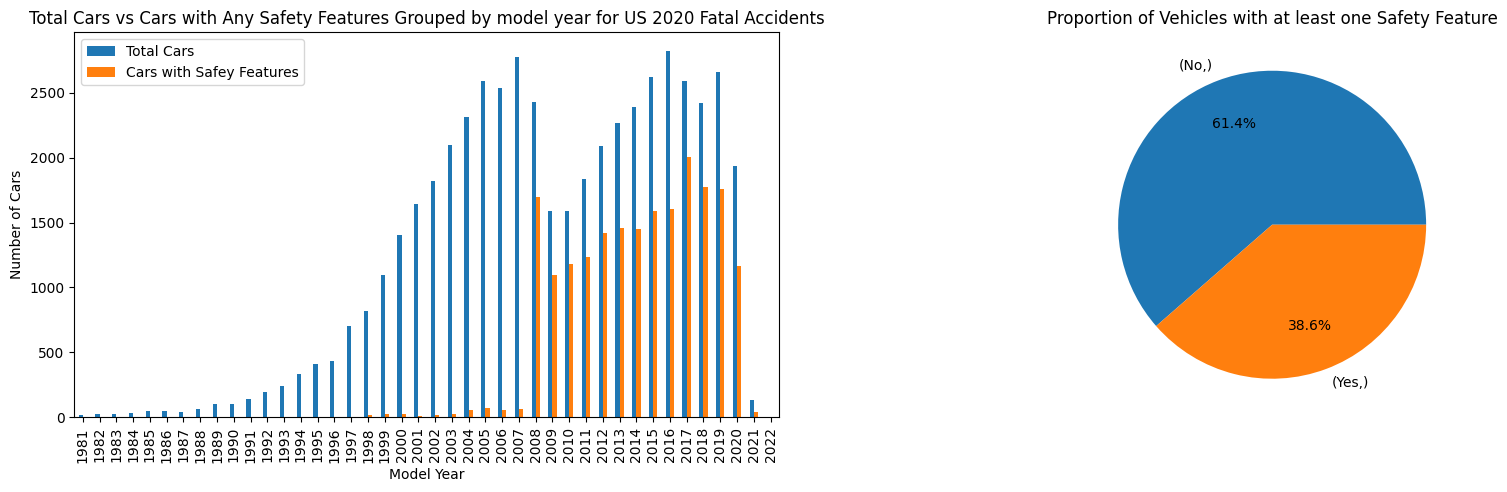

In [75]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
vehSafetyYrDf.plot.bar(stacked=False,ax=ax1)
ax1.set_xlabel("Model Year")
ax1.set_ylabel("Number of Cars")
ax1.set_title("Total Cars vs Cars with Any Safety Features Grouped by model year for US 2020 Fatal Accidents")
vehVpicMergeDf[["AnySafetyFeature"]].value_counts().rename({True:"Yes", False:"No"}).plot.pie(legend = False, \
    ylabel = "", autopct="%1.1f%%", pctdistance = 0.7, rotatelabels = False, ax=ax2)
_ = ax2.set_title("Proportion of Vehicles with at least one Safety Feature")

In [76]:
tempDf = vehVpicMergeDf[safetyFeaturesColumns].fillna(int(0))
vehSafetyFeaturesCnt = pd.Series(dtype='float64')
print("check values for every safety feature")
for x in tempDf.columns.sort_values():
    vehSafetyFeaturesCnt[safetyFeaturesNames[x]] = (tempDf[x] == 1).sum()/totalVeh*100
    print(x.ljust(max([len(x) for x in tempDf.columns])+2),"\t",str(tempDf[x].drop_duplicates().sort_values().values).ljust(16),(tempDf[x] == 1).sum())
tempDf = None
vehSafetyFeaturesCnt.sort_values(inplace=True)
vehSafetyFeaturesCnt

check values for every safety feature
AdaptiveCruiseControlId            	 [0. 1. 2. 3.]    1061
AdaptiveDrivingBeamId              	 [0. 1. 2. 3.]    1098
AntilockBrakeSystemId              	 [0. 1. 2. 3.]    6603
AutoPedestrianAlertingSoundId      	 [0. 1. 2. 3.]    179
BackupCameraId                     	 [0. 1. 2. 3.]    5063
BlindSpotInterventionId            	 [0.]             0
BlindSpotWarningId                 	 [0. 1. 2. 3.]    1154
CrashImminentBrakingID             	 [0. 1. 2. 3.]    1647
DaytimeRunningLightId              	 [0. 1. 2. 3.]    4368
DynamicBrakeSupportId              	 [0. 1. 2. 3.]    4889
ElectronicStabilityControlId       	 [0. 1.]          5360
ForwardCollisionWarningId          	 [0. 1. 2. 3.]    1699
LaneCenteringAssistanceId          	 [0. 1. 3.]       5
LaneDepartureWarningId             	 [0. 1. 2. 3.]    1420
LaneKeepingAssistanceId            	 [0. 1. 4. 5.]    1244
ParkAssistId                       	 [0. 1. 2. 3.]    191
PedestrianAutoEmergencyBra

Rear Automatic Emergency Braking      0.000000
Blind Spot Intervention               0.000000
Lane Centering Assistance             0.009721
Rear Cross Traffic Alert              0.262467
Auto Pedestrian Alerting Sound        0.348012
Park Assist                           0.371342
Pedestrian Auto Emergency Braking     1.881987
Adaptive Cruise Control               2.062798
Adaptive Driving Beam                 2.134733
Blind Spot Warning                    2.243608
Lane Keeping Assistance               2.418587
Lane Departure Warning                2.760766
Crash Imminent Braking                3.202100
Forward Collision Warning             3.303198
Daytime Running Light                 8.492272
Semi Auto Headlamp Beam Switching     8.828619
Dynamic Brake Support                 9.505201
Backup Camera                         9.843492
Traction Control                      9.969865
Electronic Stability Control         10.420920
Antilock Brake System                12.837562
Tire Pressure

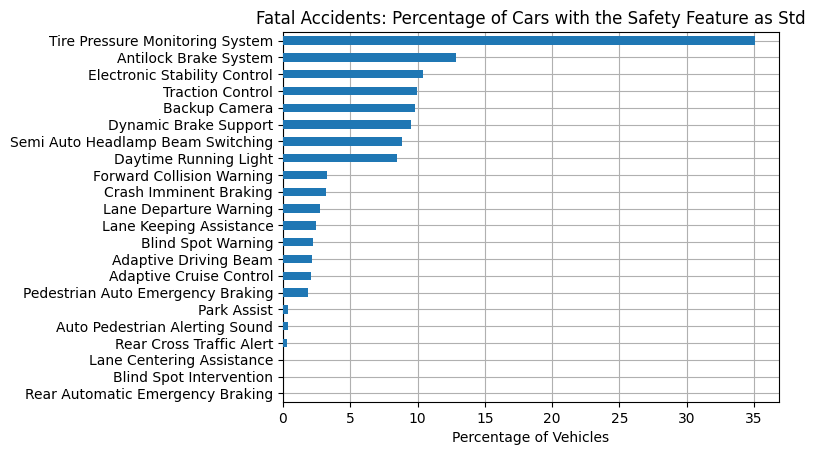

In [77]:
ax = vehSafetyFeaturesCnt.plot.barh(title="Fatal Accidents: Percentage of Cars with the Safety Feature as Std",zorder=3)
ax.set_xlabel("Percentage of Vehicles")
ax.grid()

## Write DataFrames and some Dicts to disk

In [78]:
vehVpicMergeDf.to_pickle("tmp/fars-vehvpicmergedf.pkl")
farsDf["accident"].to_pickle("tmp/fars-accidentdf.pkl")
farsDf["person"].to_pickle("tmp/fars-persondf.pkl")
farsTopModels.to_pickle("tmp/fars-topmodels.pkl")

In [79]:
import pickle

f = open("tmp/fars-categories.pkl","wb")
pickle.dump(farsCategories,f)
f.close()

## Additiona VIN/VPIC checks

In [80]:
farsCategories["STATE"]

{1: 'Alabama',
 2: 'Alaska',
 4: 'Arizona',
 5: 'Arkansas',
 6: 'California',
 8: 'Colorado',
 9: 'Connecticut',
 10: 'Delaware',
 11: 'District of Columbia',
 12: 'Florida',
 13: 'Georgia',
 15: 'Hawaii',
 16: 'Idaho',
 17: 'Illinois',
 18: 'Indiana',
 19: 'Iowa',
 20: 'Kansas',
 21: 'Kentucky',
 22: 'Louisiana',
 23: 'Maine',
 24: 'Maryland',
 25: 'Massachusetts',
 26: 'Michigan',
 27: 'Minnesota',
 28: 'Mississippi',
 29: 'Missouri',
 30: 'Montana',
 31: 'Nebraska',
 32: 'Nevada',
 33: 'New Hampshire',
 34: 'New Jersey',
 35: 'New Mexico',
 36: 'New York',
 37: 'North Carolina',
 38: 'North Dakota',
 39: 'Ohio',
 40: 'Oklahoma',
 41: 'Oregon',
 42: 'Pennsylvania',
 44: 'Rhode Island',
 45: 'South Carolina',
 46: 'South Dakota',
 47: 'Tennessee',
 48: 'Texas',
 49: 'Utah',
 50: 'Vermont',
 51: 'Virginia',
 53: 'Washington',
 54: 'West Virginia',
 55: 'Wisconsin',
 56: 'Wyoming'}

In [81]:
vehVpicMergeDf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51435 entries, 0 to 51434
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ST_CASE                           51435 non-null  int64  
 1   VEH_NO                            51435 non-null  int64  
 2   NUMOCCS                           51435 non-null  int64  
 3   MAKE                              51435 non-null  int64  
 4   MAK_MOD                           51435 non-null  int64  
 5   BODY_TYP                          51435 non-null  int64  
 6   MOD_YEAR                          51435 non-null  int64  
 7   VIN                               51435 non-null  object 
 8   TOW_VEH                           51435 non-null  int64  
 9   TRAV_SP                           51435 non-null  int64  
 10  ROLLOVER                          51435 non-null  int64  
 11  IMPACT1                           51435 non-null  int64  
 12  M_HA

In [82]:
vehVpicMergeDf[vehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna()][["VIN","GoodVPICDecode","VINDecodeError"]]

,VIN,GoodVPICDecode,VINDecodeError
0,JT8BF22G4V00,True,0
1,1G1LT53T1PY1,True,0
3,1FAFP56S34A1,True,0
4,3FAHP08156R1,True,0
5,4T1SK11E1SU4,True,0
...,...,...,...
51403,1NXBR32E76Z6,True,0
51411,KNAGE228X953,True,0
51413,2FACP74W2NX1,True,0
51414,1C3CCBCG1DN5,True,0


In [83]:
vehVpicMergeDf["VIN"].isna().sum()

0

In [84]:
vehVpicMergeDf = pd.merge(vehVpicMergeDf,farsDf["accident"][["ST_CASE","STATE"]],on="ST_CASE")
vehVpicMergeDf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51435 entries, 0 to 51434
Data columns (total 77 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ST_CASE                           51435 non-null  int64  
 1   VEH_NO                            51435 non-null  int64  
 2   NUMOCCS                           51435 non-null  int64  
 3   MAKE                              51435 non-null  int64  
 4   MAK_MOD                           51435 non-null  int64  
 5   BODY_TYP                          51435 non-null  int64  
 6   MOD_YEAR                          51435 non-null  int64  
 7   VIN                               51435 non-null  object 
 8   TOW_VEH                           51435 non-null  int64  
 9   TRAV_SP                           51435 non-null  int64  
 10  ROLLOVER                          51435 non-null  int64  
 11  IMPACT1                           51435 non-null  int64  
 12  M_HA

In [85]:
print(vehVpicMergeDf[vehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna() & (vehVpicMergeDf["STATE"] == 36)][["STATE"]].value_counts())
print(vehVpicMergeDf[vehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna() & (vehVpicMergeDf["STATE"] == 36)][["ST_CASE"]].drop_duplicates().count())

STATE
36       403
dtype: int64
ST_CASE    358
dtype: int64


Next steps:
1) see if GVWR_FROM can be infered from Model/Year/Trim/Series... from NYSDMV values
2) get vehicle grouping finalized